In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.method as mem
import meteva.product as mpd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import pandas as pd

本模块的函数族旨在提供基于带有时空信息的观测预报数据进行分类检验的方法，函数会返回每个分组样本对应的混淆矩阵，频率统计等表格结果，表格会以矩阵形式返回，同时会输出到excel文件当中。在浏览本模块函数说明之前可先参阅函数设计的[关键技术思想](https://www.showdoc.cc/meteva?page_id=4072178802924517)以及本模块测试用的[数据简介](https://www.showdoc.cc/nmc?page_id=3831227192066999)

In [2]:
###################以下开始为数据收集部分的程序

#设置关注的起始时段
time_start = datetime.datetime(2019,1,1,8,0)   
time_end = datetime.datetime(2020,1,1,8,0)
#读取站点列表，并将站点内容为缺省值，当其作为读取站点数据的参数时，如果站点文件中某个站号不存在时,返回结果中该站点保持为缺省值
station = meb.read_stadata_from_micaps3(r"H:\test_data\input\mpd\ob\temp_2m\BT19010102.000")
station.iloc[:,-1] = meb.IV 


##读取收集观测数据
dir_ob = r"H:\test_data\input\mpd\ob\temp_2m\BTYYMMDDHH.000"
sta_list = []
time0 = time_start
while time0 < time_end:
    path = meb.get_path(dir_ob,time0)
    sta = meb.read_stadata_from_micaps3(path,station = station,time = time0,dtime = 0,level = 0,data_name = "ob")
    sta_list.append(sta)
    time0 += datetime.timedelta(hours = 3)
ob_sta_all = pd.concat(sta_list,axis = 0)  #数据拼接
ob_sta_all = meb.sele_by_para(ob_sta_all,value=[-100,100]) #简单的质量控制

#读取收集ec预报数据
dir_ec = r"H:\test_data\input\mpd\ec\temp_2m\YYMMDD\BTYYMMDDHH.TTT"
sta_list =[]
time0 = time_start
while time0 <= time_end:
    for dh in range(0,73,3):
        path = meb.get_path(dir_ec,time0,dh)
        grd = meb.read_griddata_from_micaps4(path)
        if grd is not None:
            sta = meb.interp_gs_linear(grd,station)
            meb.set_stadata_coords(sta,time = time0,dtime = dh,level = 0)
            meb.set_stadata_names(sta,["ecmwf"])
            sta_list.append(sta)
    time0 += datetime.timedelta(hours = 132)  #此处跳着读是为了减少测试用时
ec_sta_all = pd.concat(sta_list,axis = 0)  #数据拼接
            
#读取收集grapes预报数据
dir_grapes = r"H:\test_data\input\mpd\grapes\temp_2m\YYMMDD\BTYYMMDDHH.TTT"
sta_list =[]
time0 = time_start
while time0 <= time_end:
    for dh in range(0,73,3):
        path = meb.get_path(dir_grapes,time0,dh)
        grd = meb.read_griddata_from_micaps4(path)
        if grd is not None:
            sta = meb.interp_gs_linear(grd,station)
            meb.set_stadata_coords(sta,time = time0,dtime = dh,level = 0)
            meb.set_stadata_names(sta,["grapes"])
            sta_list.append(sta)  
    time0 += datetime.timedelta(hours = 132)
grapes_sta_all = pd.concat(sta_list,axis = 0)  #数据拼接
    
#数据匹配合并
sta_all = meb.combine_on_obTime_id(ob_sta_all,[ec_sta_all,grapes_sta_all])
sta_all = meb.sele_by_para(sta_all,drop_IV = True)  #删除包含缺省值的样本
###################以上为数据收集部分的程序

H:\test_data\input\mpd\ob\temp_2m\BT19010602.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19010902.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19031614.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19042914.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19050805.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19050911.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19052917.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19052920.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19060614.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19060702.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19061214.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19061217.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19063002.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19063011.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19071111.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19071114.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19081611.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19090714.000文件不存在
H:\test_data\input\mpd\ob\te

H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.000 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.003 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.006 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.009 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.012 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.015 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.018 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.021 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.024 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.027 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.030 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.033 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.036 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT1904

<font face="黑体" color=blue size=5>图片型检验产品制作</font>   
**plot(sta_ob_and_fos0,method,s = None,g = None,gll = None,save_dir = None,**kwargs)**  
根据输入的站点数据和检验方法，生成图片型检验产品，并自动生成后缀名为.png的文件批量输出到指定目录  


|参数|说明|  
|:--|:--|  
|<font face="黑体" color=blue size=5>**sta_ob_and_fos**</font>|实况和预报合并对齐后的数据，形式为站点数据格式如上述例子中的sta_all|   
|<font face="黑体" color=blue size=5>**method**</font>|method中的各类图片型的函数名称，例如mem.performance,mem.scatter_regress,mem.pdf_plot,mem.box_plot_continue,mem.frequency_histogram, mem.rank_histogram,mem.comprehensive_probability等函数|   
|**s**| 用于选择数据样本的字典参数，具体的参数说明可参见meb.sele_by_dict中的[<font face="黑体" color=red size=5>s</font>](https://www.showdoc.cc/meteva?page_id=3975604785954540)参数  |   
|**g**|用于分组检验的参数，具体用法可参见meb.group中的[<font face="黑体" color=red size=5>g</font>](https://www.showdoc.cc/meteva?page_id=4071849185300418)参数|     
|**gll**| 用于分组检验的参数，具体用法可参见meb.group中的[<font face="黑体" color=red size=5>gll</font>](https://www.showdoc.cc/meteva?page_id=4071849185300418)参数|  
|**save_dir**|生成的表格文件的保存目录|
|**kwargs| 检验方法 meteva.method 中的可选参数，具体用法参见下面的示例|   
|<font face="黑体" color=blue size=5>return</font>|返回实际分组的列表|  
  
**调用示例：**

('ob', 'fo', 'member_list', 'rtype', 'vmax', 'vmin', 'ncol', 'save_path', 'show', 'dpi', 'title')


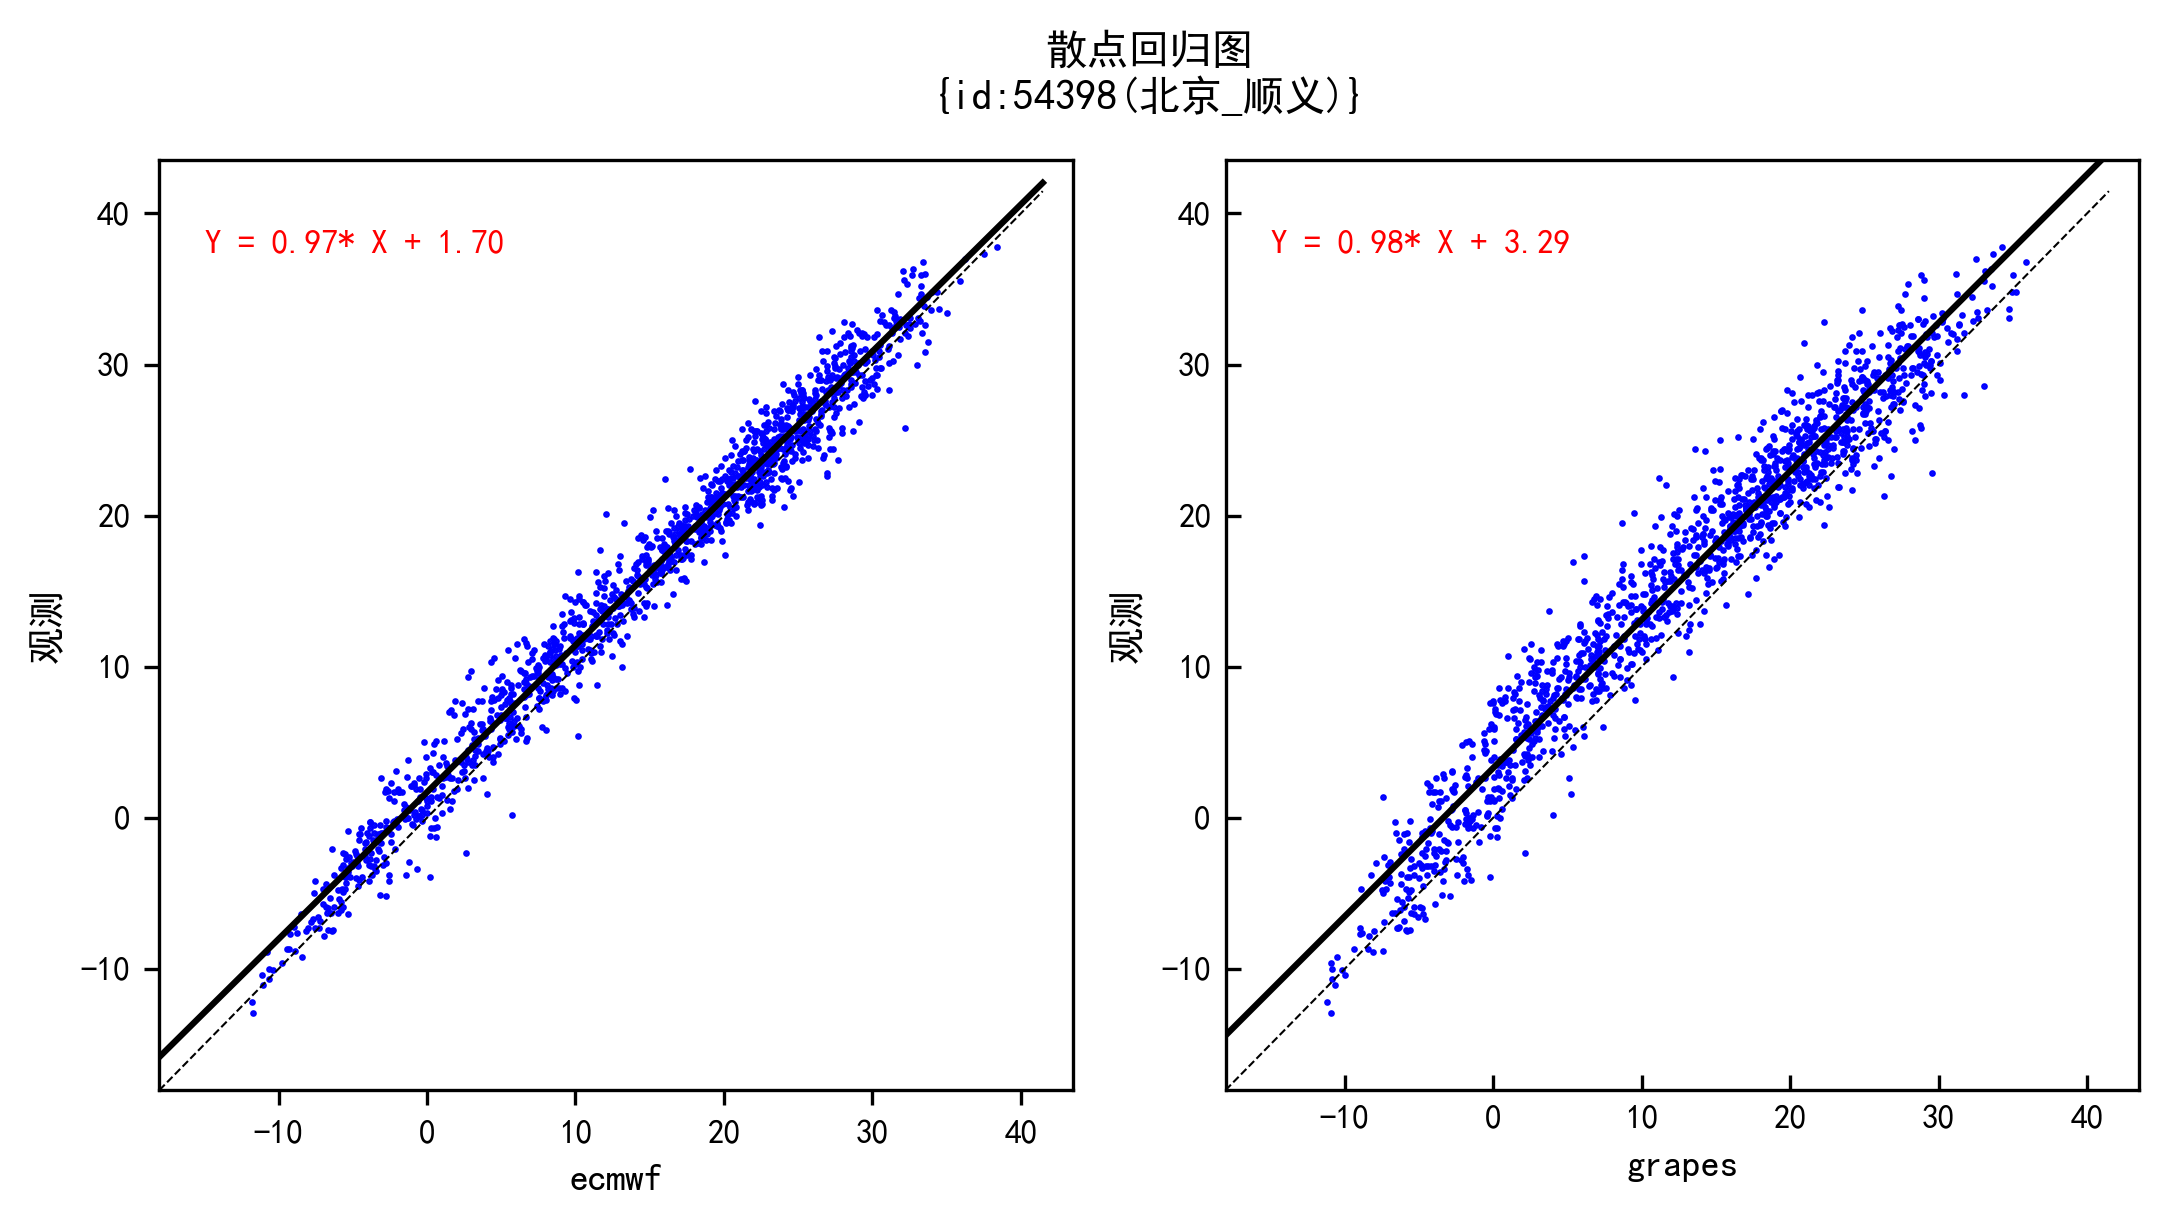

In [3]:
mpd.plot(sta_all,mem.scatter_regress,s = {"id":54398}) #选取54398站进行检验，group_by = None

从上面的整体检验可以看出grapes模式在54398站上的温度预报存在系统性偏低的情况。如果想进一步分析不同时刻起报的预报是否都存在这样的问题，可以进一步设置group_by = "hour"来检验，如下：

('ob', 'fo', 'member_list', 'rtype', 'vmax', 'vmin', 'ncol', 'save_path', 'show', 'dpi', 'title')


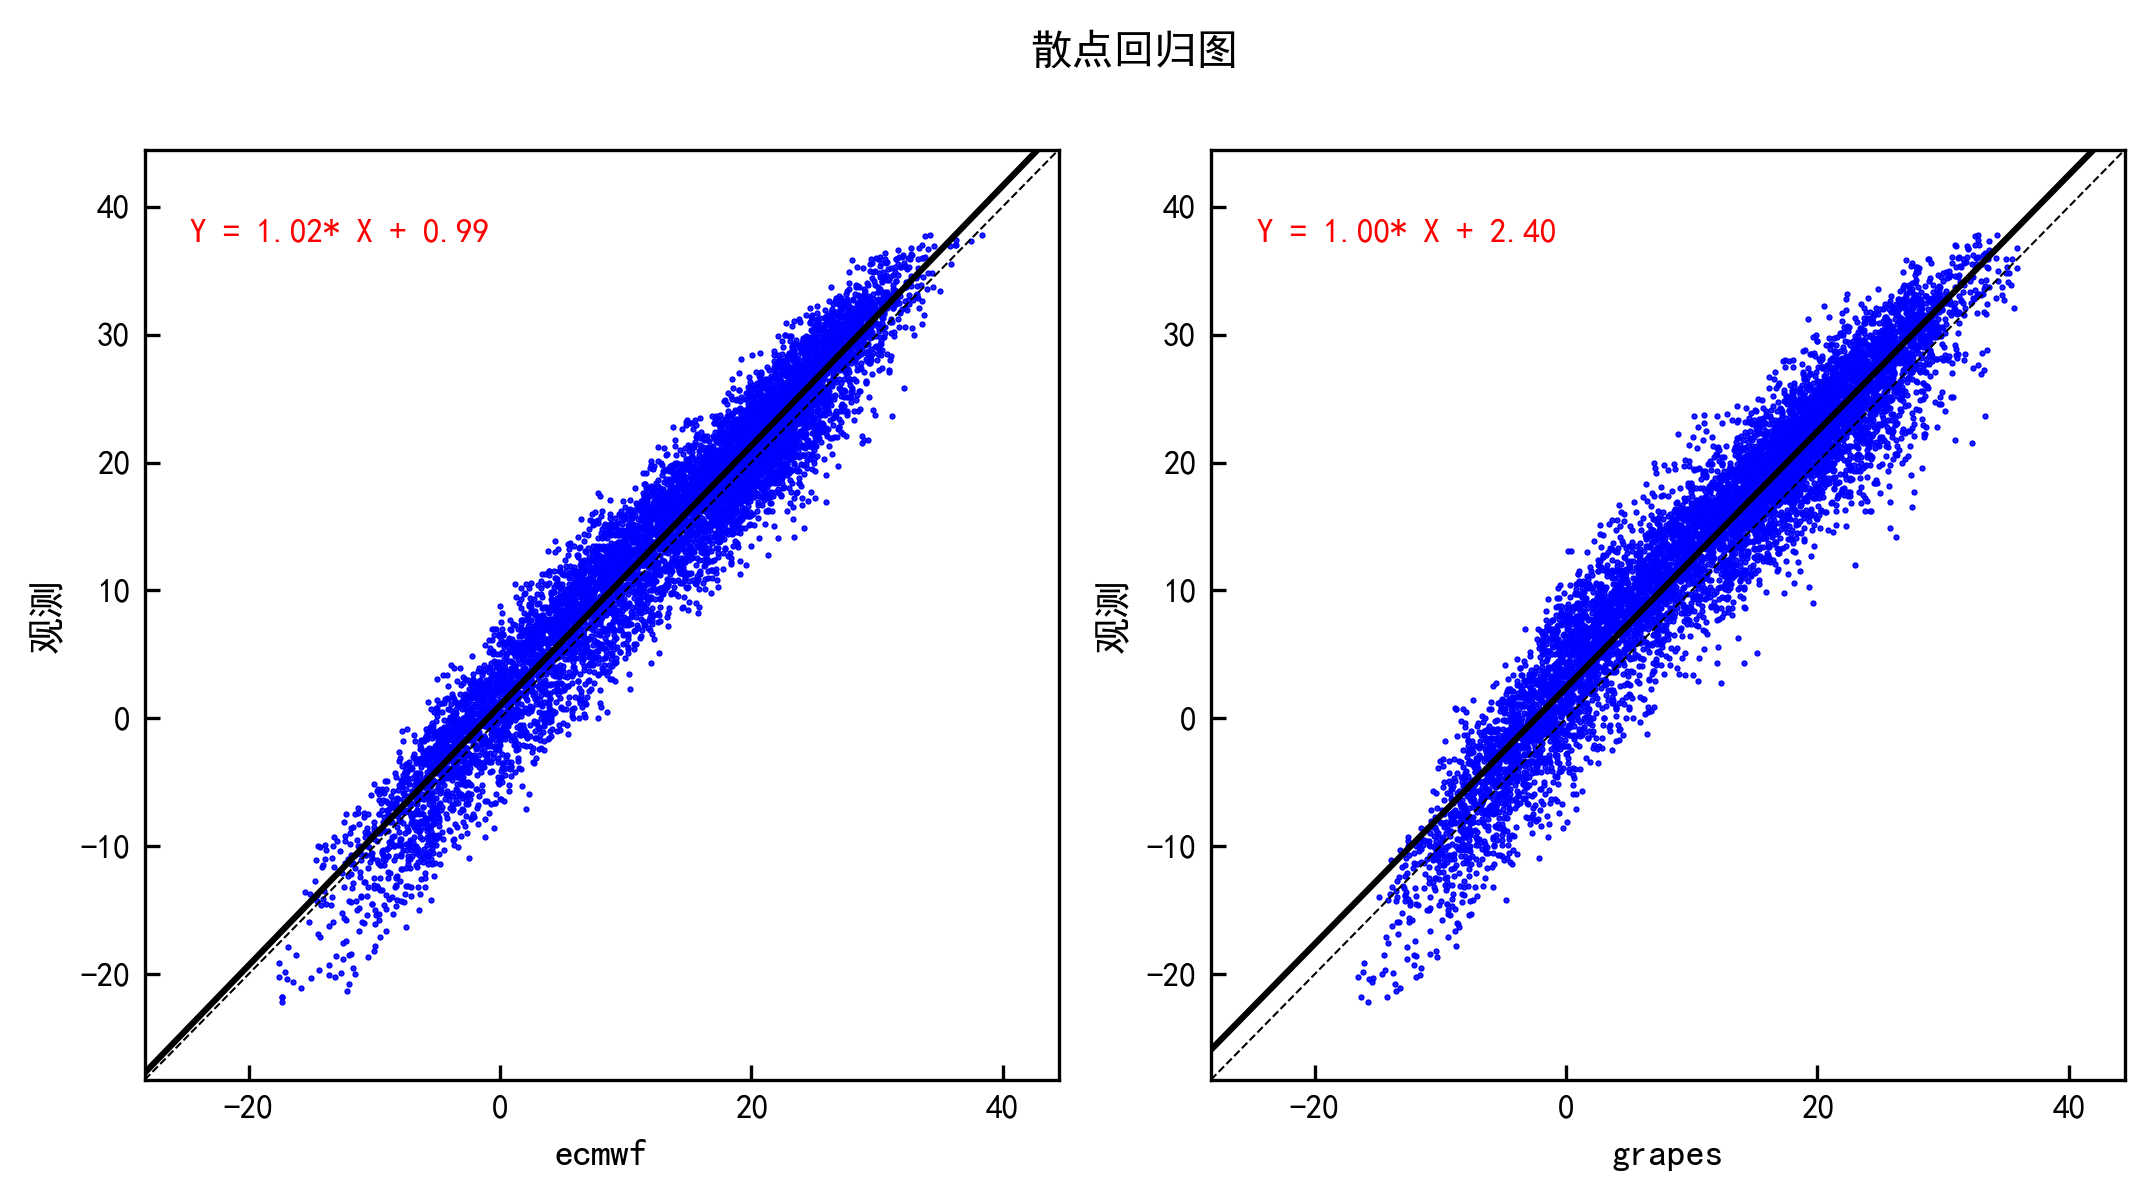

In [4]:
mpd.plot(sta_all,mem.scatter_regress) #输入需要检验的数据和方法，即可自动绘制相应的检验图形产品

('ob', 'fo', 'member_list', 'vmax', 'vmin', 'save_path', 'show', 'dpi', 'title')


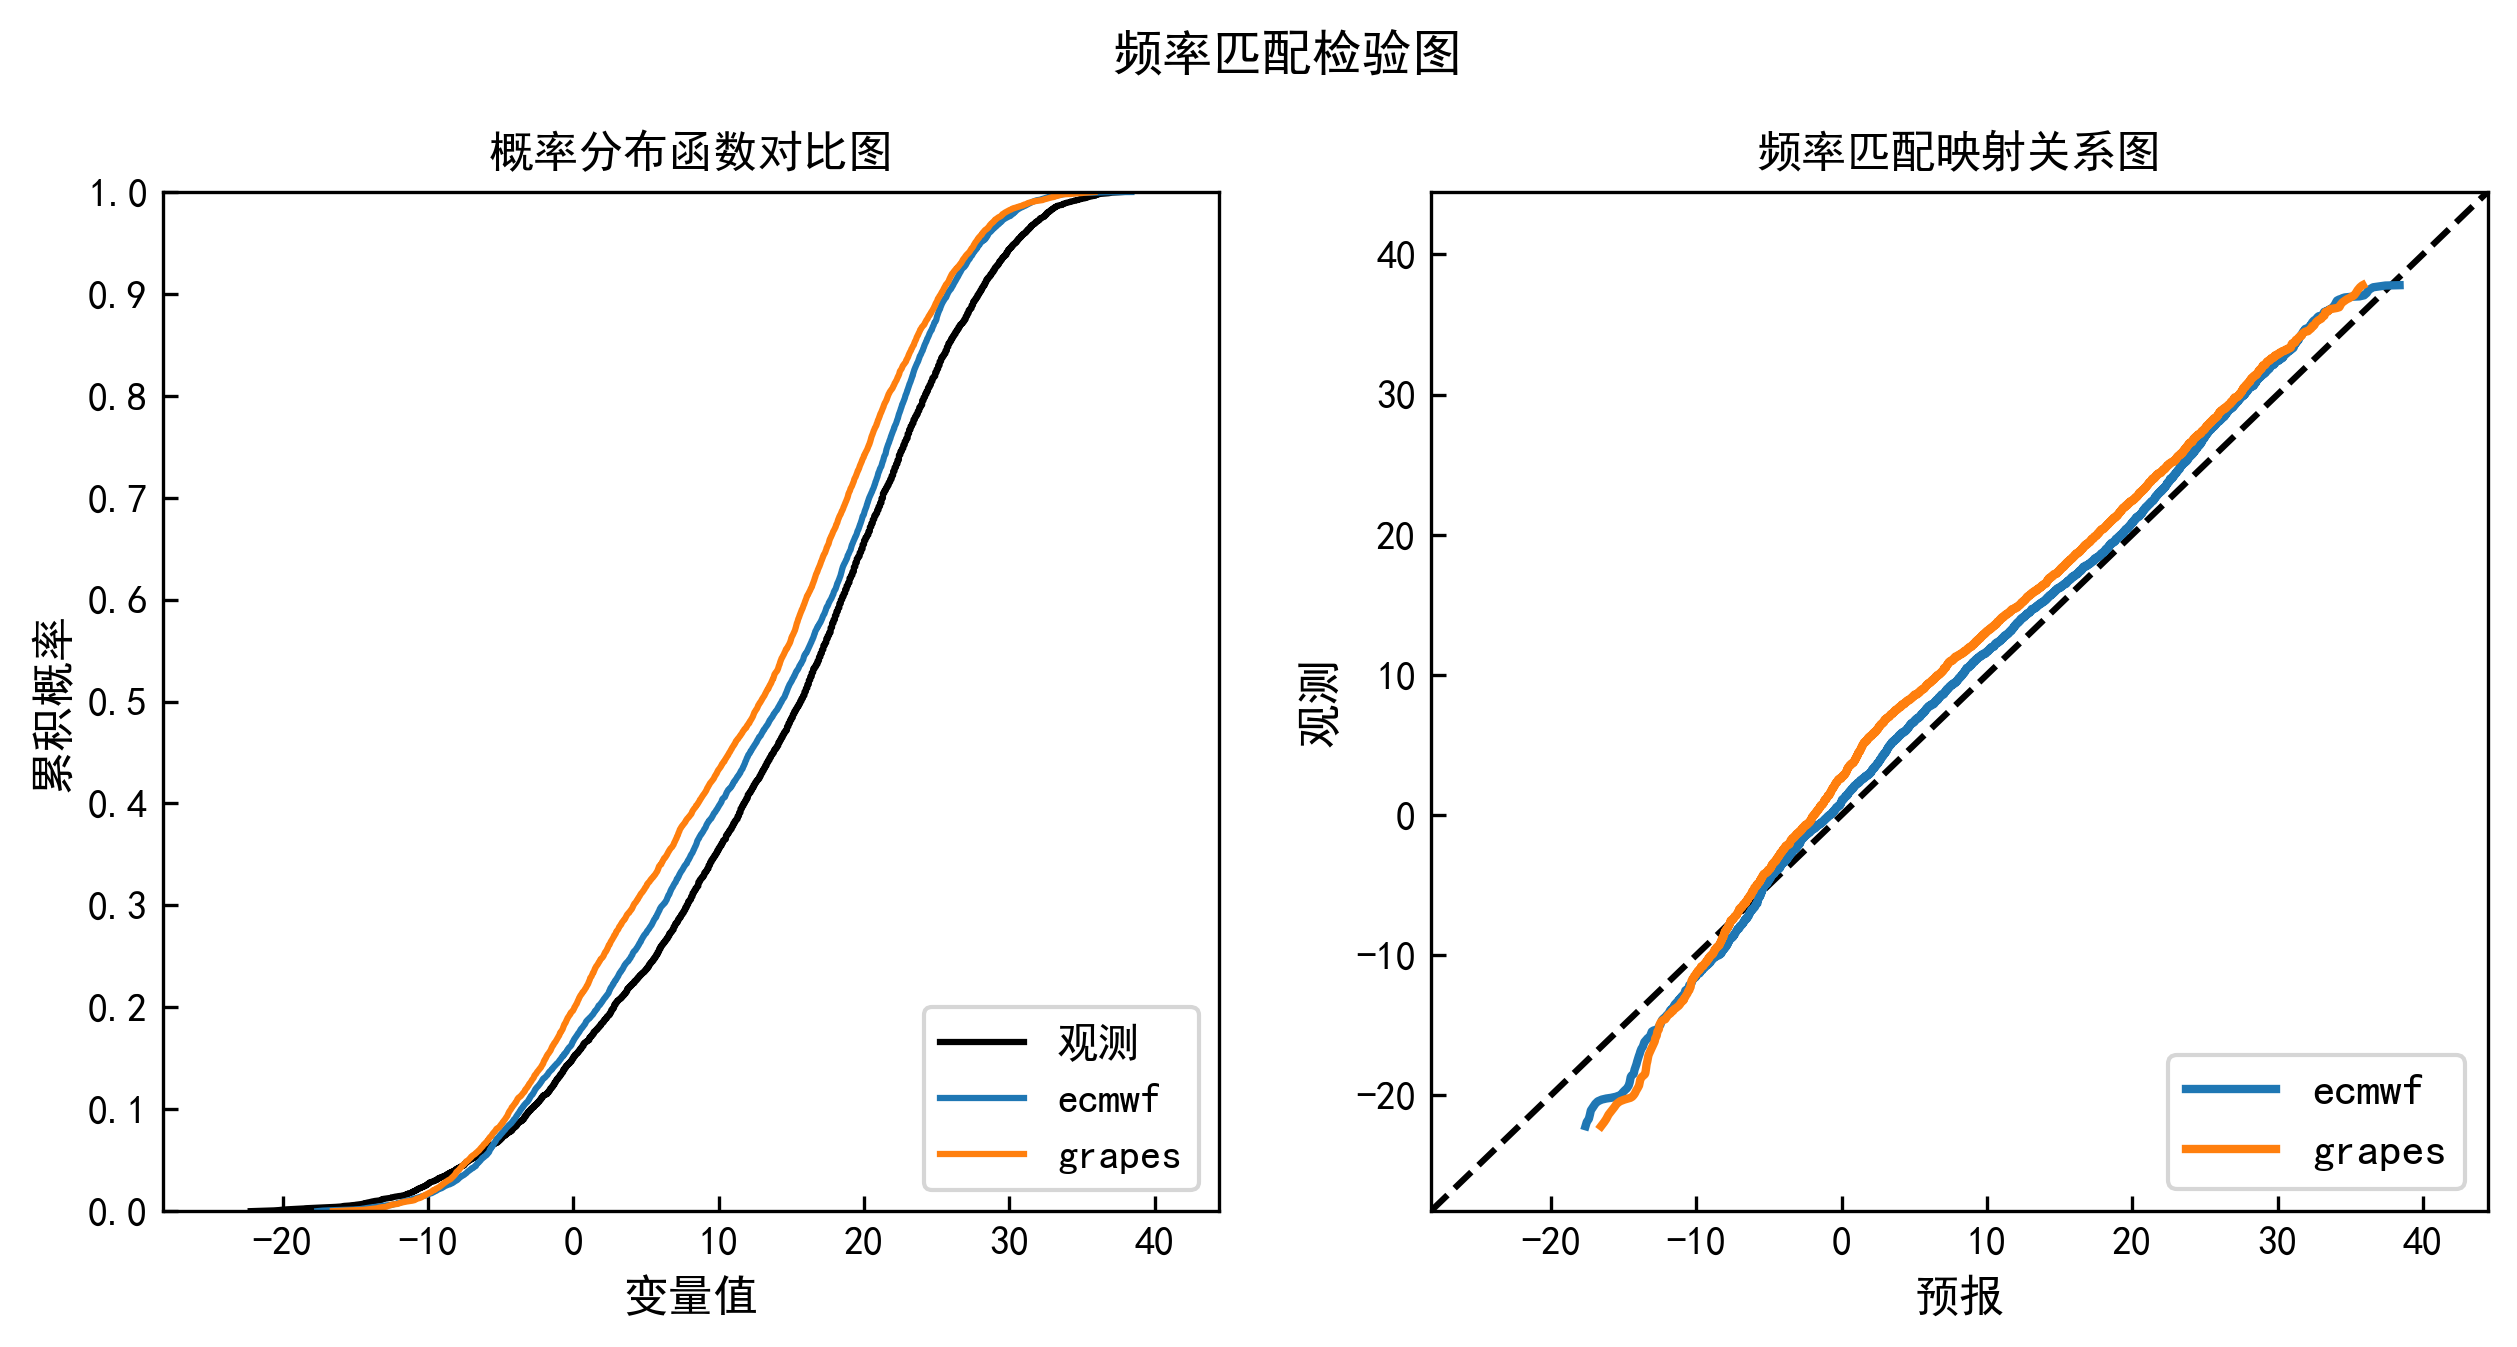

In [5]:
mpd.plot(sta_all,mem.pdf_plot) #切换一下检验方法名，即可以完成新的检验产品的制作

('ob', 'fo', 'member_list', 'vmax', 'vmin', 'save_path', 'show', 'dpi', 'title')


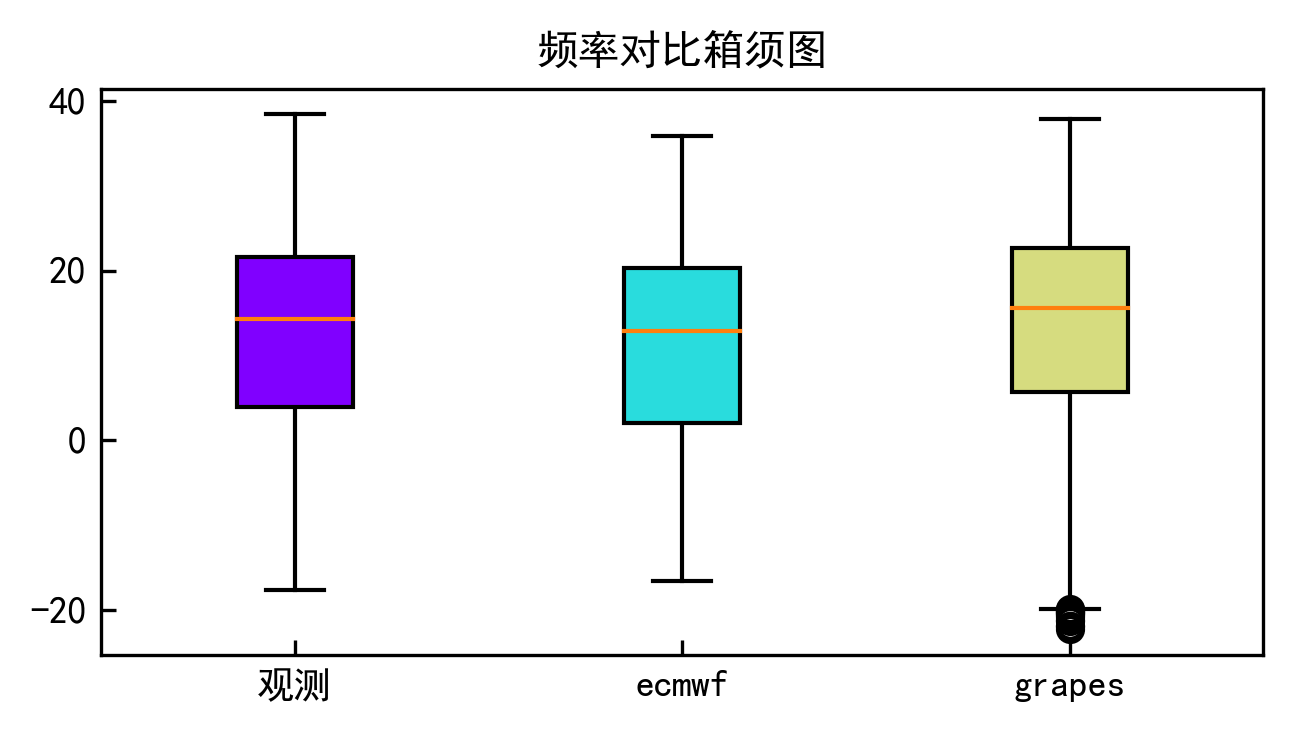

In [6]:
mpd.plot(sta_all,mem.box_plot_continue) #制作观测预报频率对比箱须图

('ob', 'fo', 'grade_list', 'member_list', 'save_path', 'show', 'dpi', 'title')


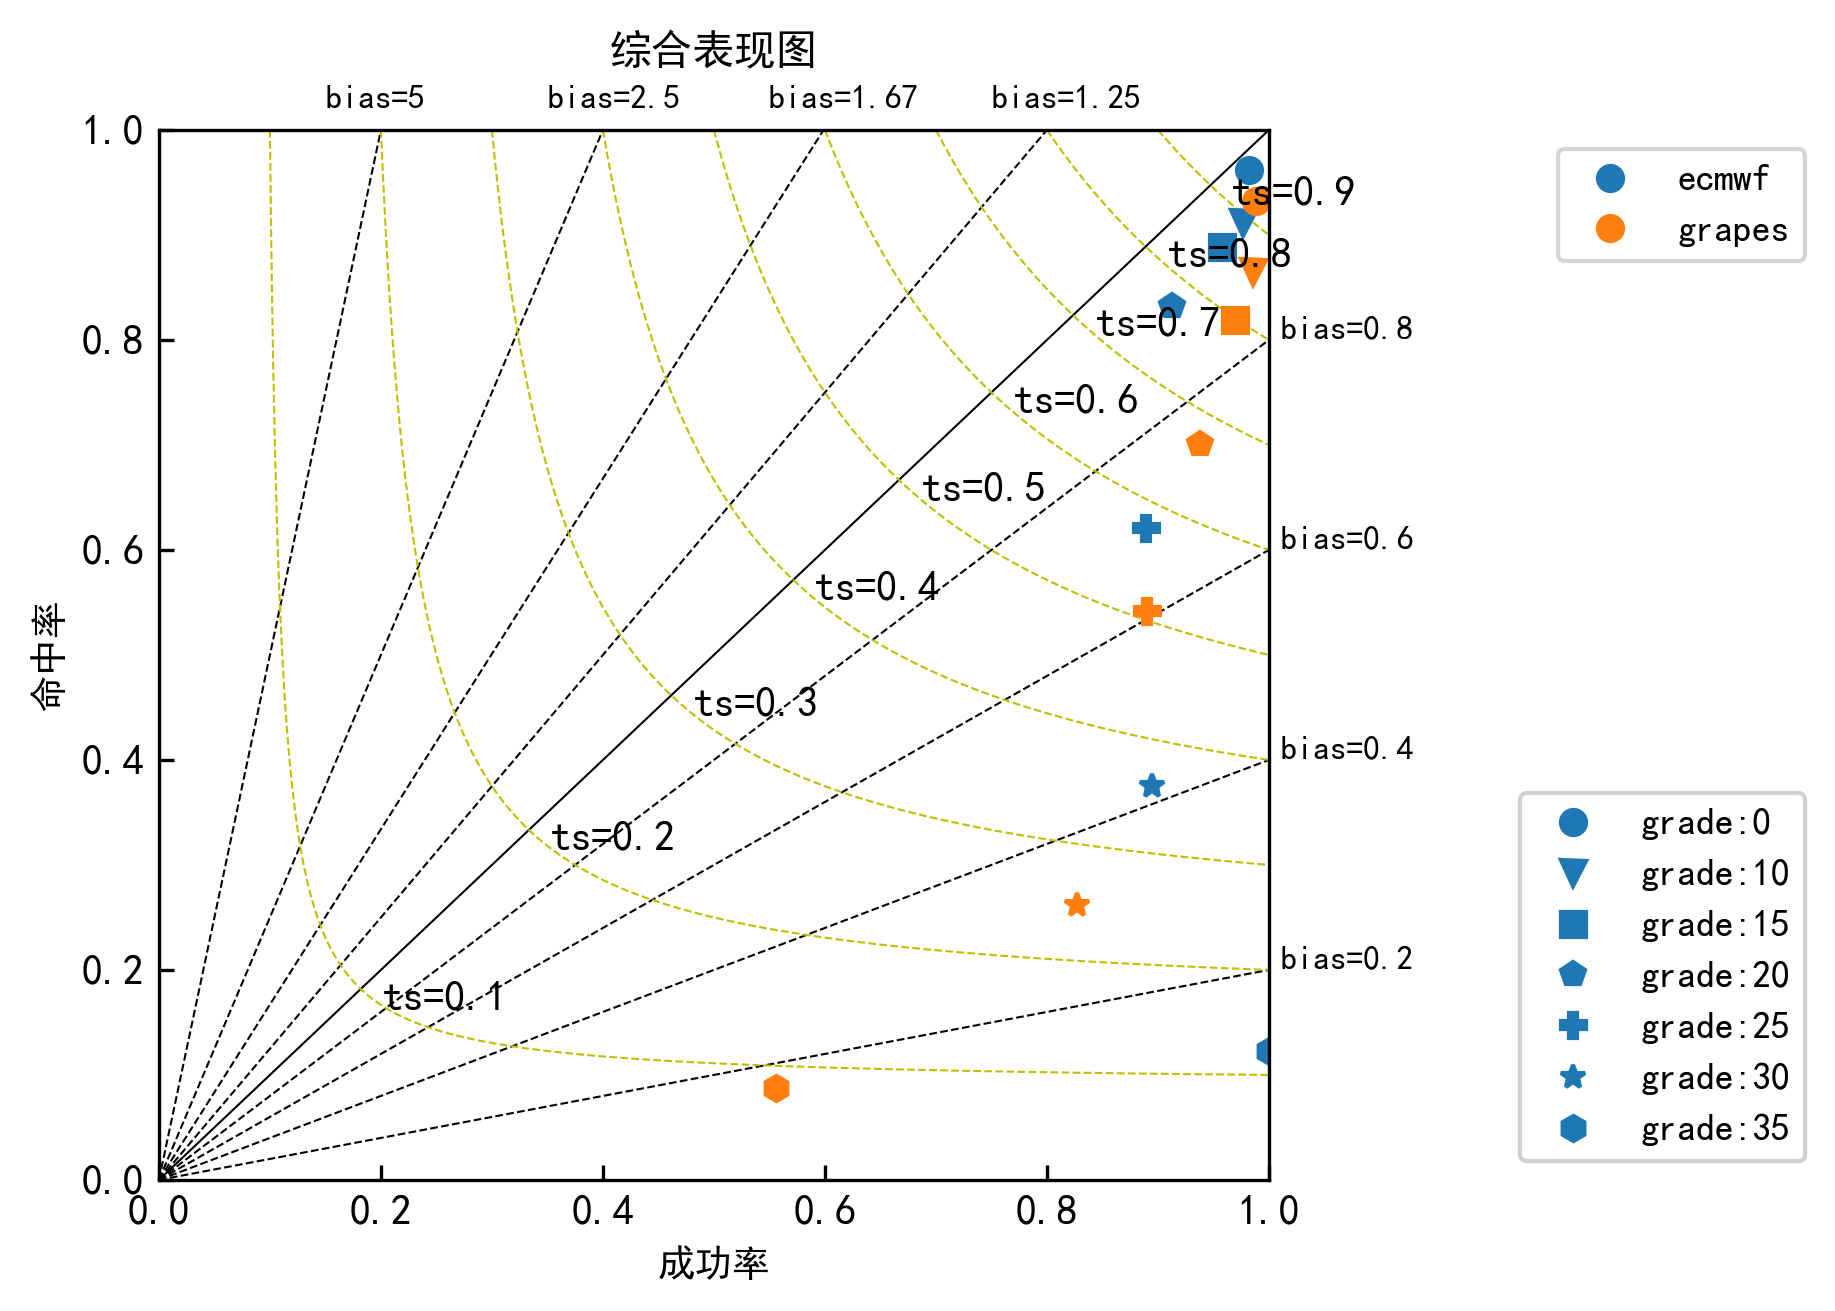

In [7]:
mpd.plot(sta_all,mem.performance,grade_list = [0,10,15,20,25,30,35]) 
#制作二分类预报的综合表现图，grade_list 是mem.performance函数中的参数

('ob', 'fo', 'grade_list', 'member_list', 'vmax', 'save_path', 'show', 'dpi', 'title')


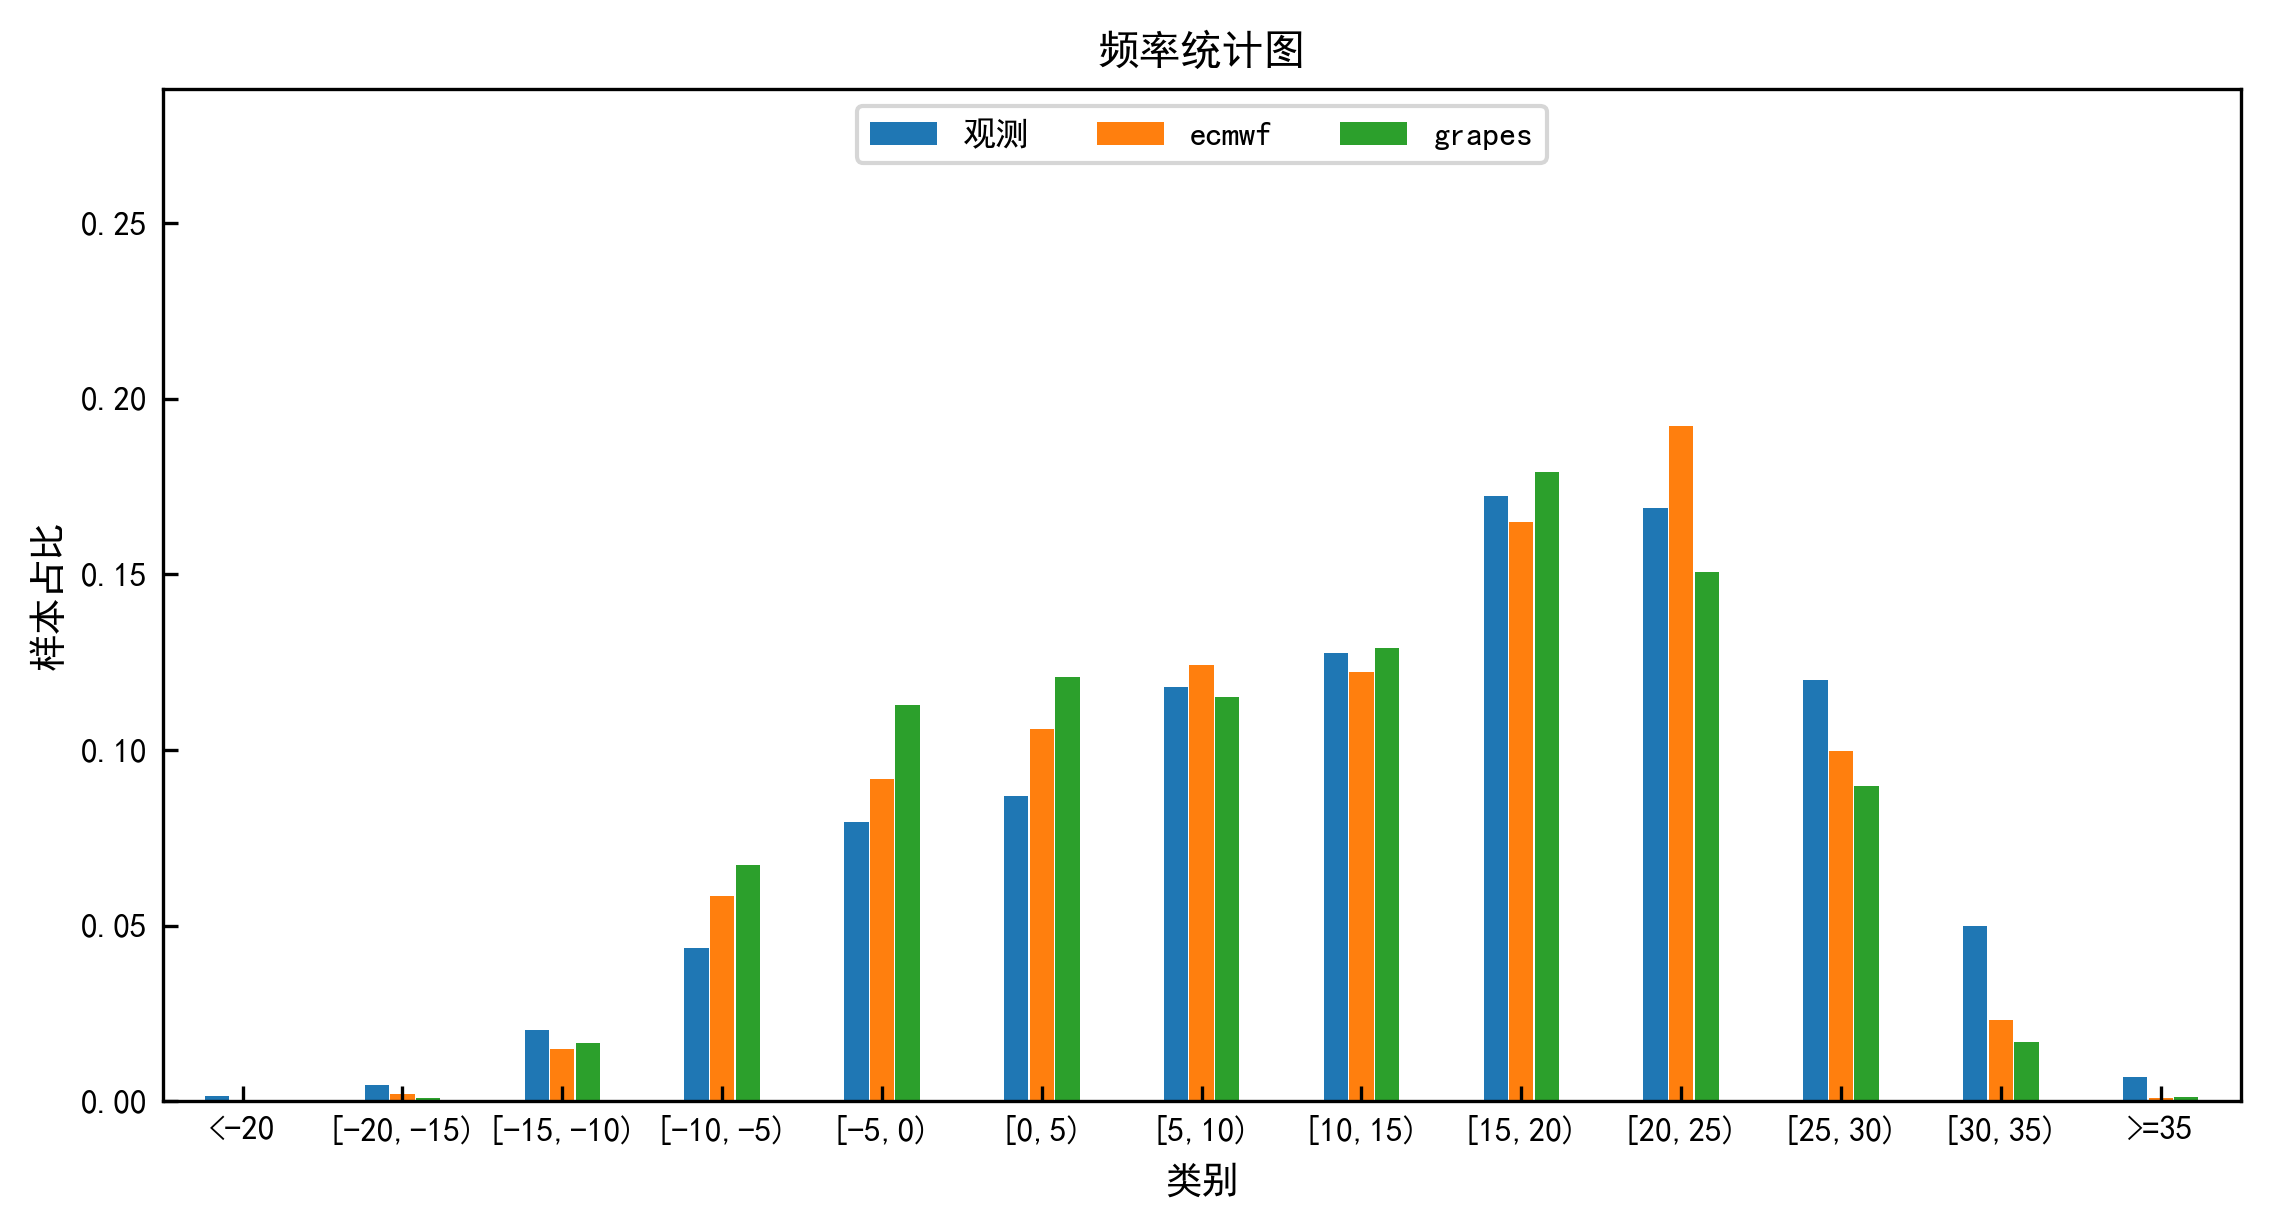

In [8]:
mpd.plot(sta_all,mem.frequency_histogram,grade_list = np.arange(-20,40,5).tolist()) #制作预报观测频率

('ob', 'fo', 'grade_list', 'member_list', 'vmax', 'save_path', 'show', 'dpi', 'title')


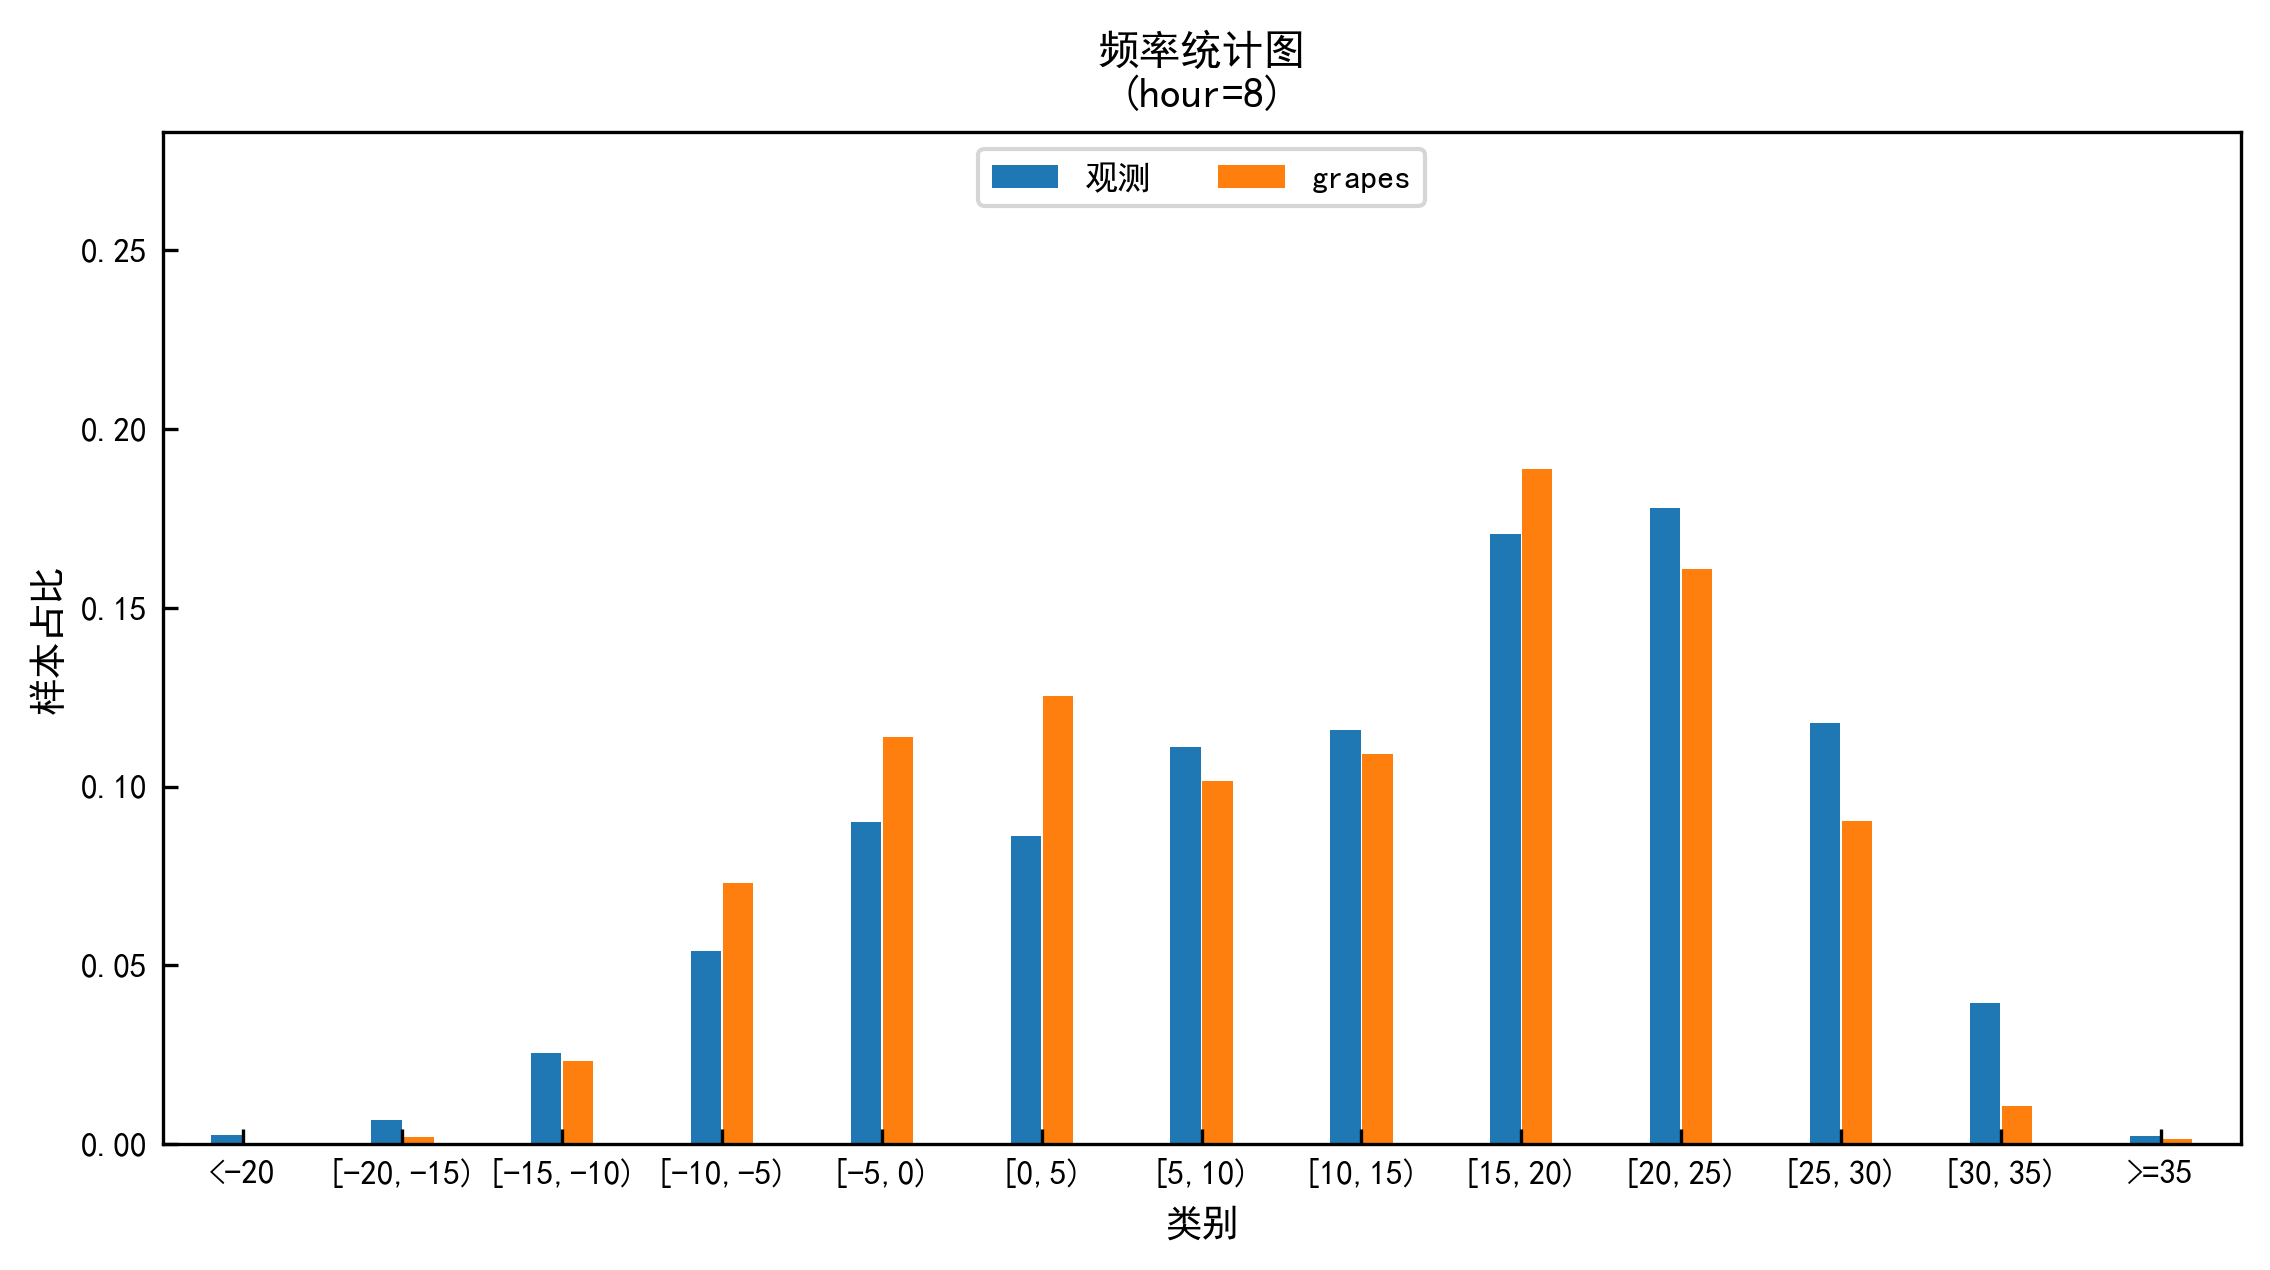

('ob', 'fo', 'grade_list', 'member_list', 'vmax', 'save_path', 'show', 'dpi', 'title')


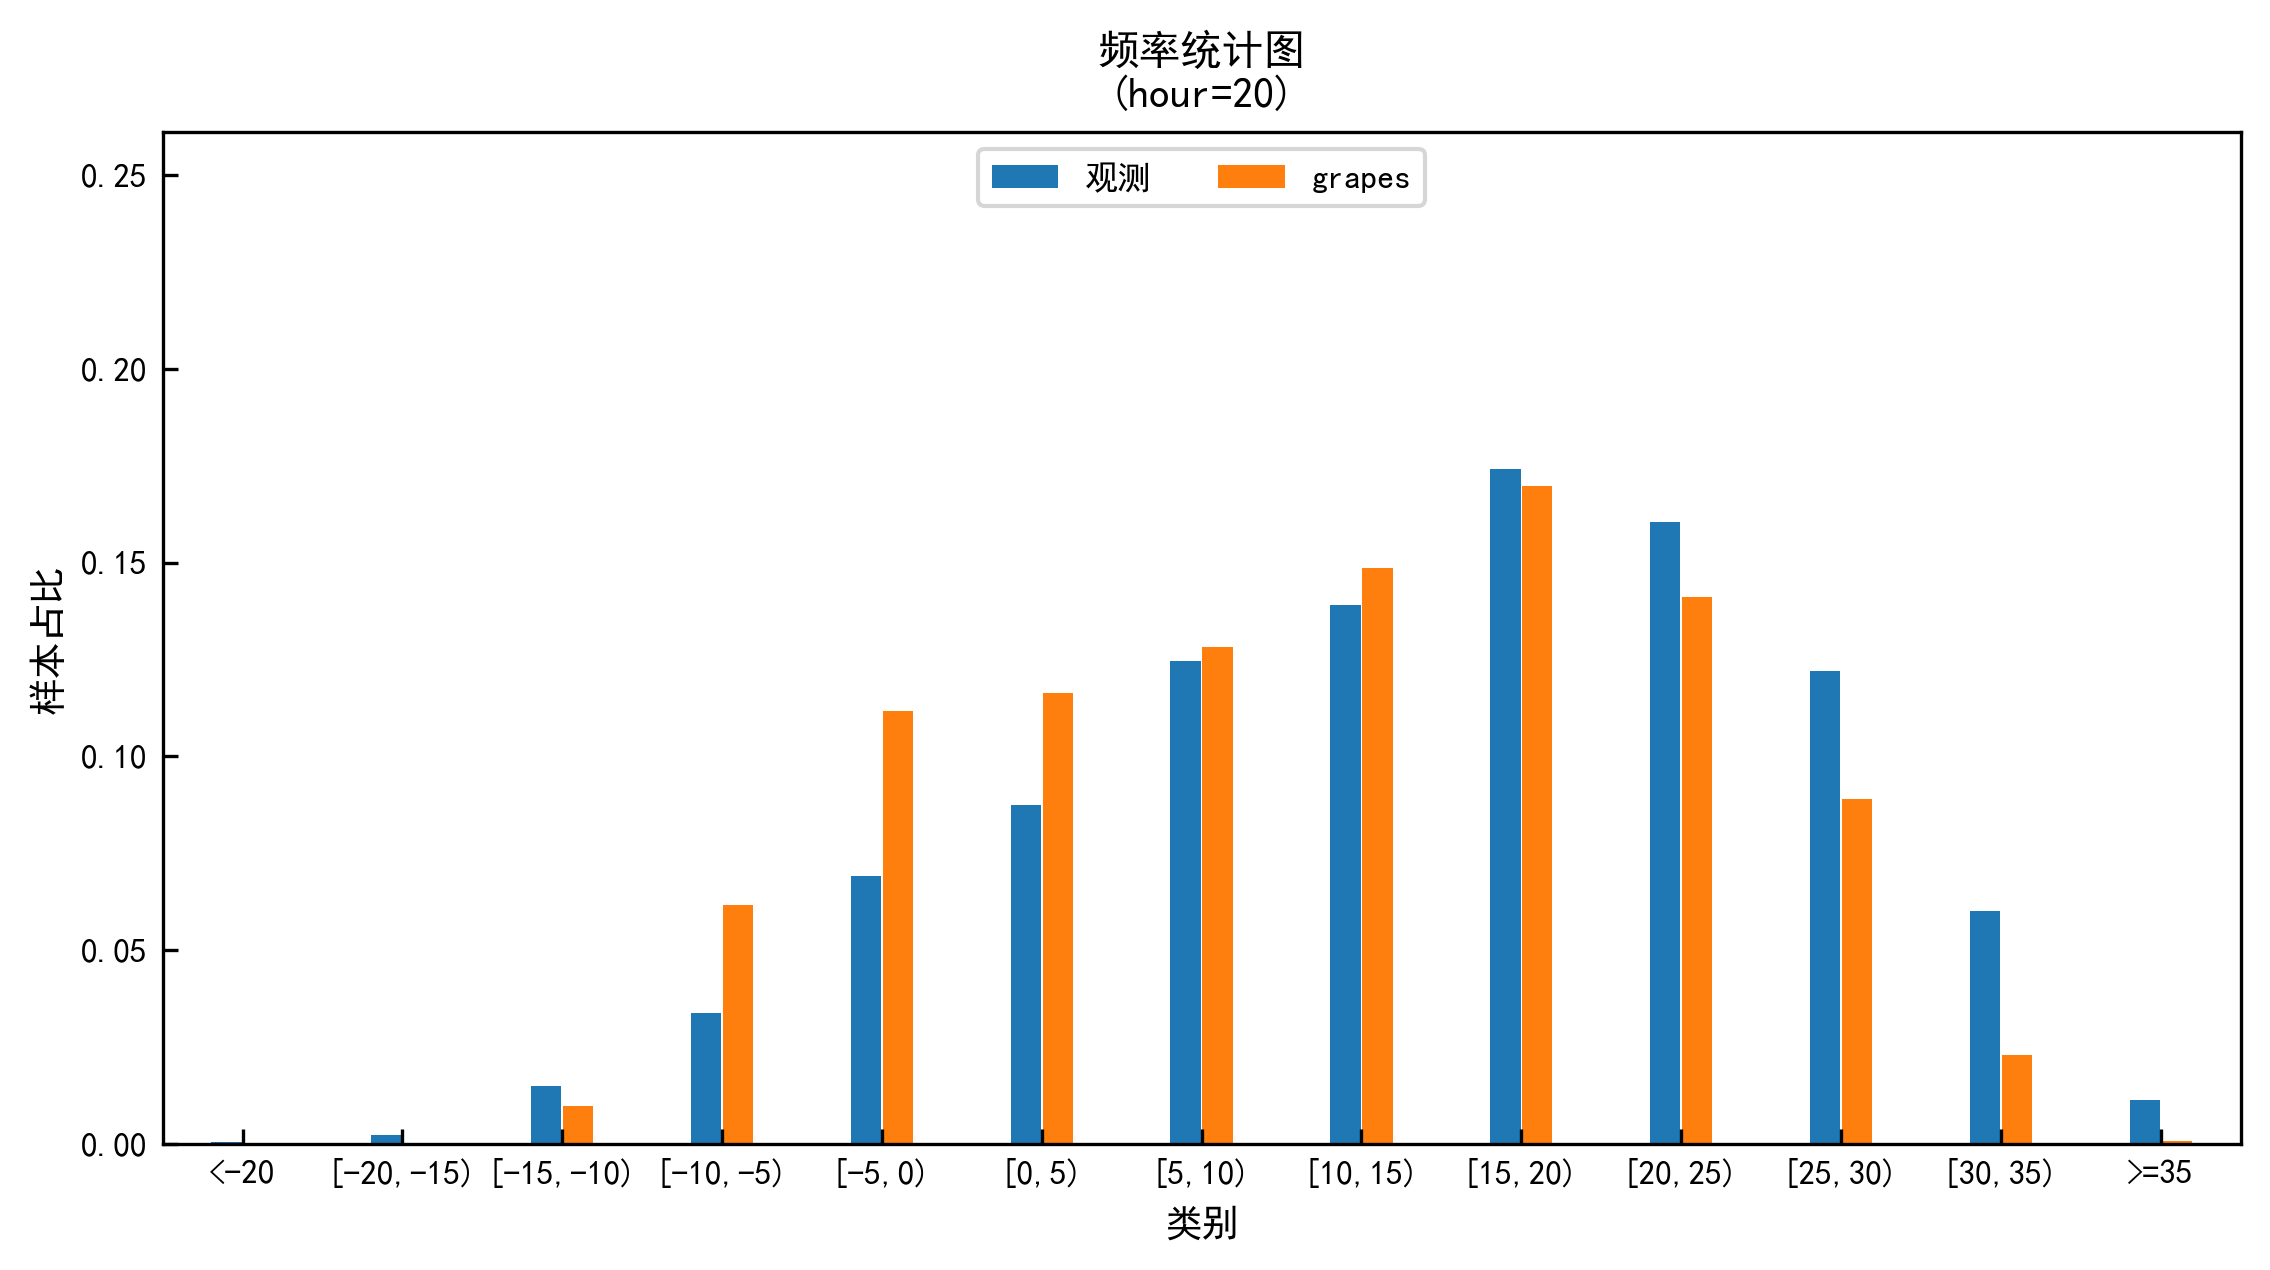

[8, 20]

In [9]:
mpd.plot(sta_all,mem.frequency_histogram,s = {"member":["ob","grapes"]},g = "hour",
         grade_list = np.arange(-20,40,5).tolist()) 

In [10]:
#一下构造一个集合预报预报用于测试
import copy
sta_ensemble = meb.in_member_list(sta_all,["ob","ecmwf"])  #提取观测和ec预报的温度数据
sample_count = len(sta_ensemble.index)
meb.set_stadata_names(sta_ensemble,["ob",0])
for i in range(1,21):
    sta_ensemble[i] = sta_ensemble[0].values + 3*np.random.randn(sample_count)
print(sta_ensemble)    #打印构建的概率预报结果

      level                time  dtime     id    lon   lat   ob      0  \
0         0 2019-01-06 20:00:00      0  54398  116.6  40.1 -6.3 -6.016   
1         0 2019-01-06 20:00:00      0  54410  116.1  40.6 -7.0 -8.712   
2         0 2019-01-06 20:00:00      0  54416  116.9  40.4 -9.5 -7.156   
3         0 2019-01-06 20:00:00      0  54419  116.6  40.4 -7.6 -8.164   
4         0 2019-01-06 20:00:00      0  54499  116.2  40.2 -5.4 -7.756   
...     ...                 ...    ...    ...    ...   ...  ...    ...   
8336      0 2019-12-24 20:00:00     72  54410  116.1  40.6 -5.7 -6.452   
8337      0 2019-12-24 20:00:00     72  54416  116.9  40.4 -6.1 -2.892   
8338      0 2019-12-24 20:00:00     72  54419  116.6  40.4 -3.9 -4.068   
8339      0 2019-12-24 20:00:00     72  54499  116.2  40.2 -1.7 -4.276   
8340      0 2019-12-24 20:00:00     72  54412  116.6  40.7 -4.9 -6.140   

              1         2  ...         11         12         13         14  \
0     -5.172183 -8.821832  ...  -

('ob', 'fo', 'member_list', 'vmax', 'vmin', 'save_path', 'show', 'dpi', 'title')


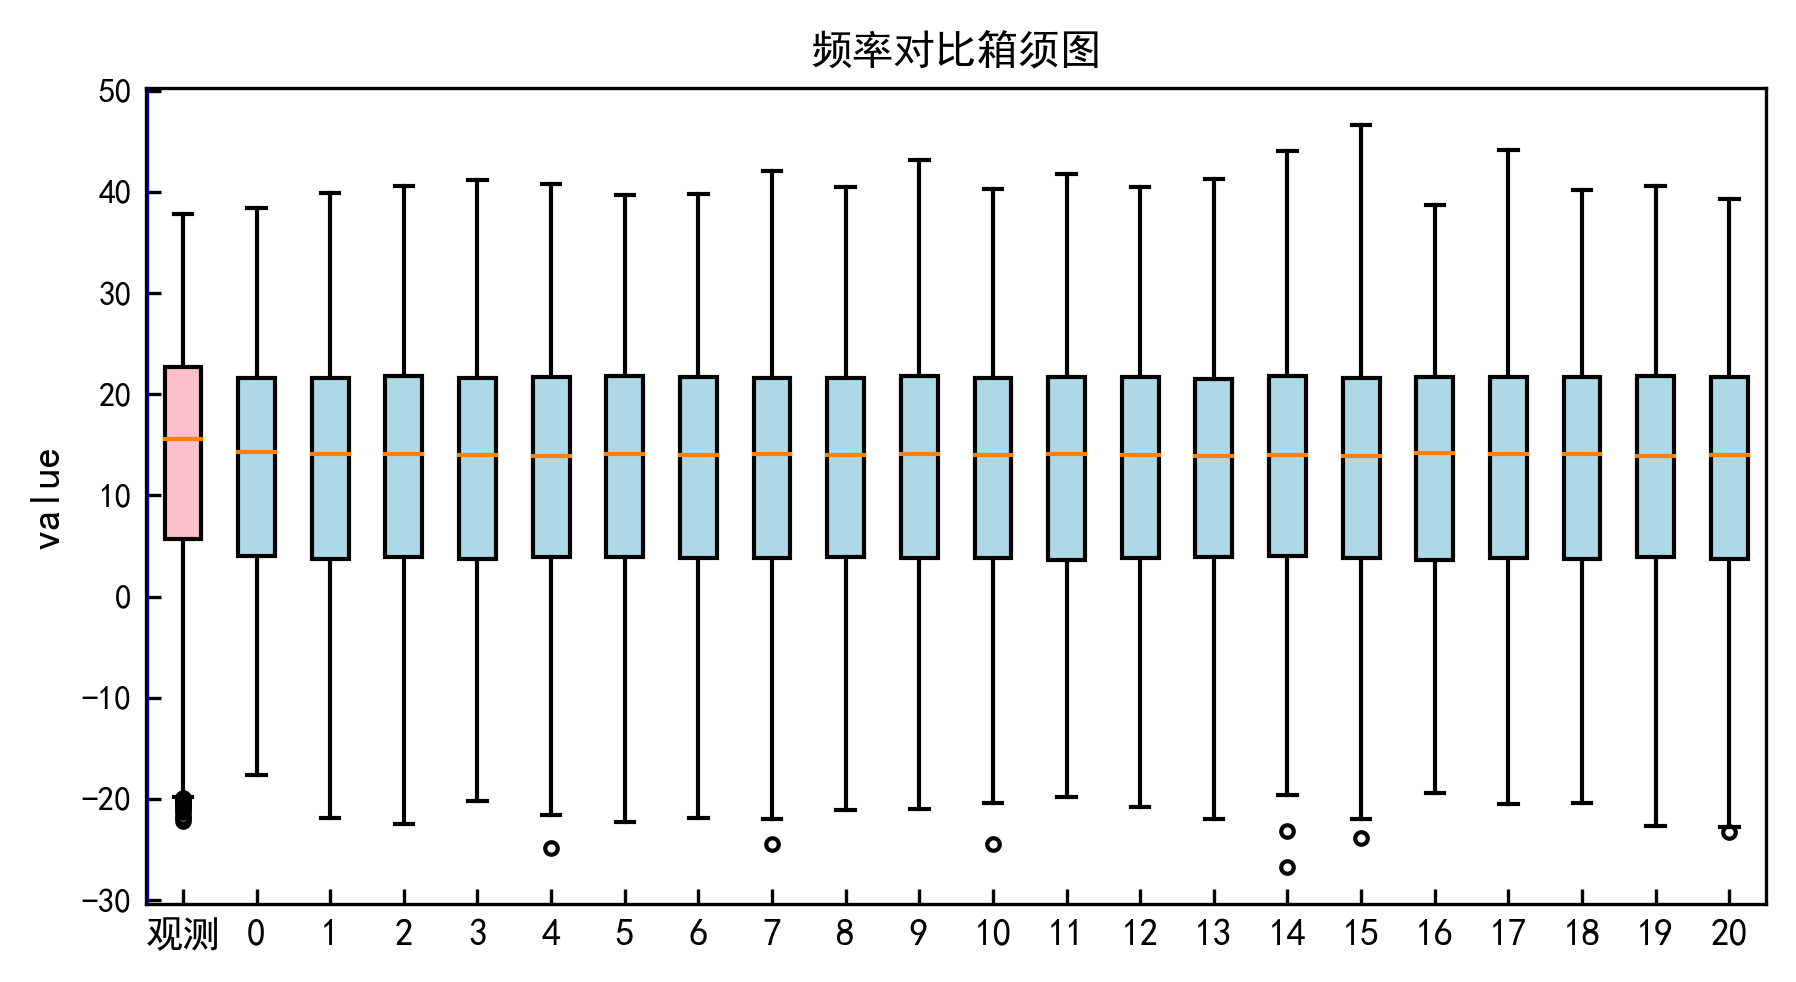

In [11]:
mpd.plot(sta_ensemble,mem.box_plot_ensemble)

('ob', 'fo', 'vmax', 'save_path', 'show', 'dpi', 'title')


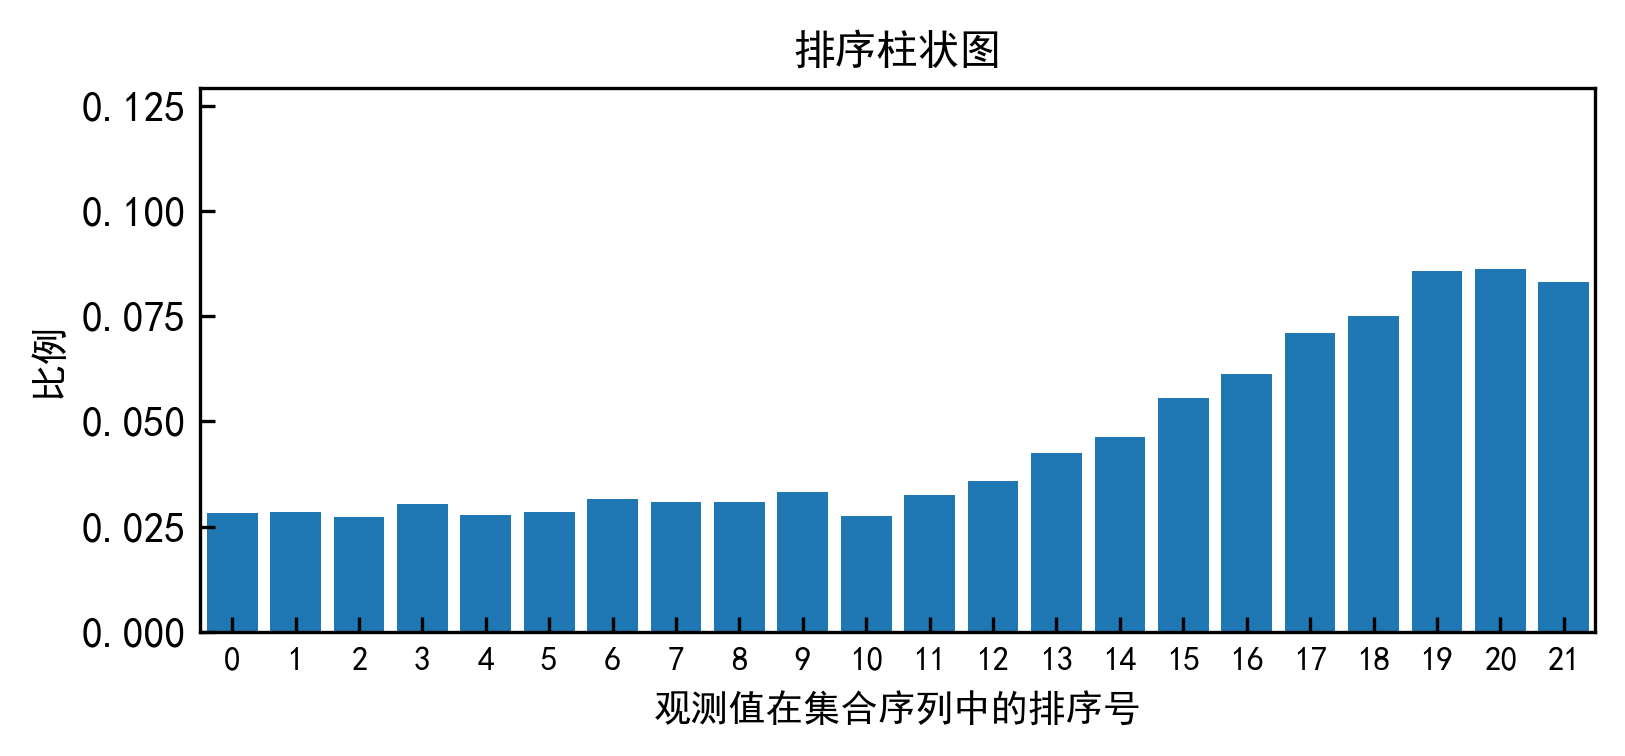

In [12]:
mpd.plot(sta_ensemble,mem.rank_histogram)

In [13]:
#一下构造一个概率预报用于测试
import copy
sta_ec = meb.in_member_list(sta_all,["ob","ecmwf"])  #提取观测和ec预报的温度数据
sta_ec = meb.between_value_range(sta_ec,-4,4)        #测试数据中仅保留观测和预报的取值范围都在 -4 到4 之内的样本
sta_p0 =copy.deepcopy(sta_ec)          #开始构建概率预报，设预报的目标是观测值大于 0  的概率
p_ob = np.zeros(len(sta_p0.index))     #原始观测值小于0，则观测样本的概率值被记为0
p_ob[sta_p0["ob"]> 0] = 1              #原始观测值大于0，则观测样本的概率值记为1
sta_p0["ob"] = p_ob[:]
p_fo_ecmwf = (sta_p0["ecmwf"].values+4)/8    #概率预报 采用 原始预报的线性函数代表，取值范围会在0-1之间。
p_fo_grapes = np.sqrt(p_fo_ecmwf)    #生成grapes的概率预报，它的取值范围也会在0-1之间。
sta_p0["ecmwf"] = p_fo_ecmwf
sta_p0["grapes"] = p_fo_grapes
print(sta_p0)    #打印构建的概率预报结果

      level                time  dtime     id    lon   lat   ob   ecmwf  \
13        0 2019-03-02 20:00:00      0  54410  116.1  40.6  1.0  0.7530   
18        0 2019-03-08 08:00:00      0  54398  116.6  40.1  1.0  0.4915   
20        0 2019-03-08 08:00:00      0  54416  116.9  40.4  0.0  0.3940   
21        0 2019-03-08 08:00:00      0  54419  116.6  40.4  0.0  0.3460   
22        0 2019-03-08 08:00:00      0  54499  116.2  40.2  1.0  0.2590   
...     ...                 ...    ...    ...    ...   ...  ...     ...   
8325      0 2019-12-13 20:00:00     72  54416  116.9  40.4  0.0  0.2430   
8326      0 2019-12-13 20:00:00     72  54419  116.6  40.4  0.0  0.1170   
8327      0 2019-12-13 20:00:00     72  54499  116.2  40.2  0.0  0.0915   
8328      0 2019-12-13 20:00:00     72  54412  116.6  40.7  0.0  0.0055   
8335      0 2019-12-24 20:00:00     72  54398  116.6  40.1  0.0  0.2285   

        grapes  
13    0.867756  
18    0.701071  
20    0.627694  
21    0.588218  
22    0.508920

('Ob', 'Fo', 'grade_count', 'member_list', 'vmax', 'save_path', 'show', 'dpi', 'title')


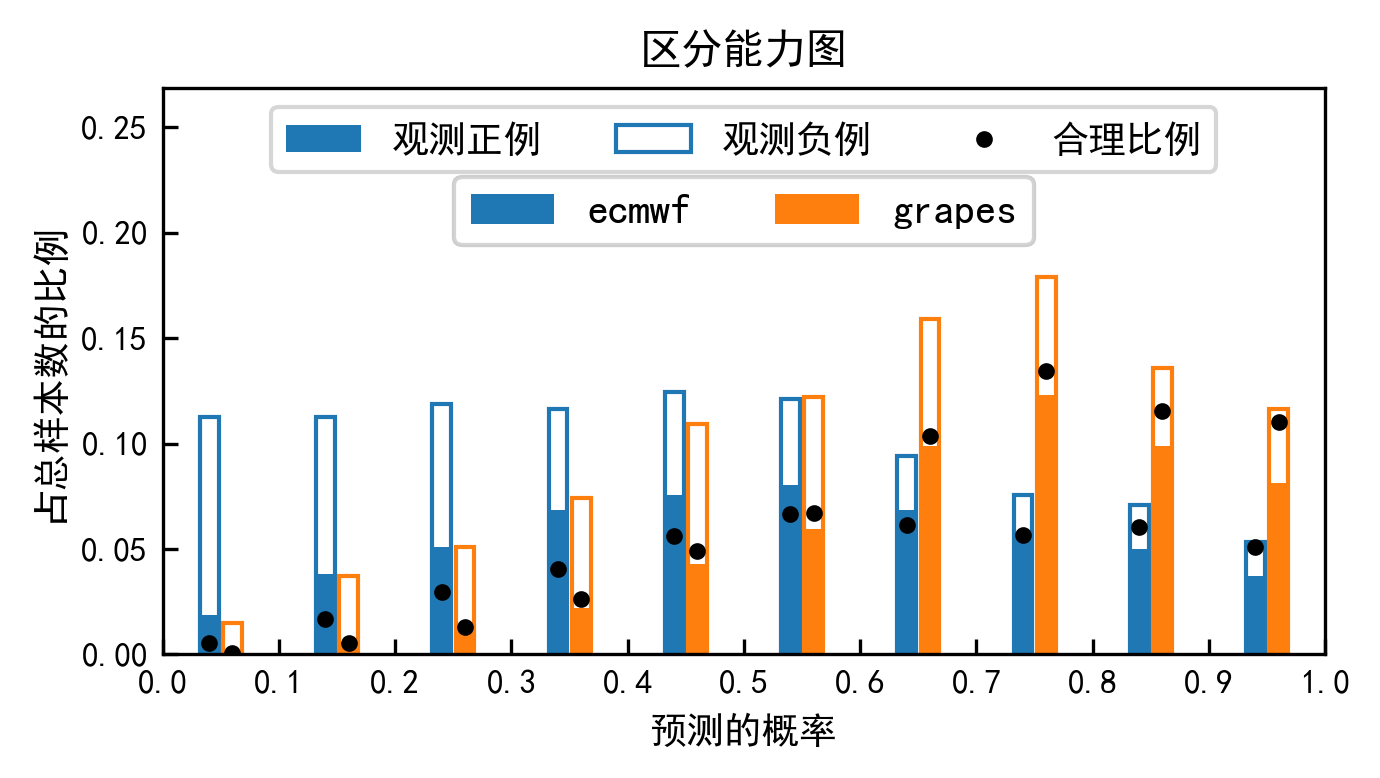

In [14]:
mpd.plot(sta_p0,mem.discrimination)  #绘制概率预报区分能力图

('Ob', 'Fo', 'grade_count', 'member_list', 'vmax', 'save_path', 'show', 'dpi', 'title')


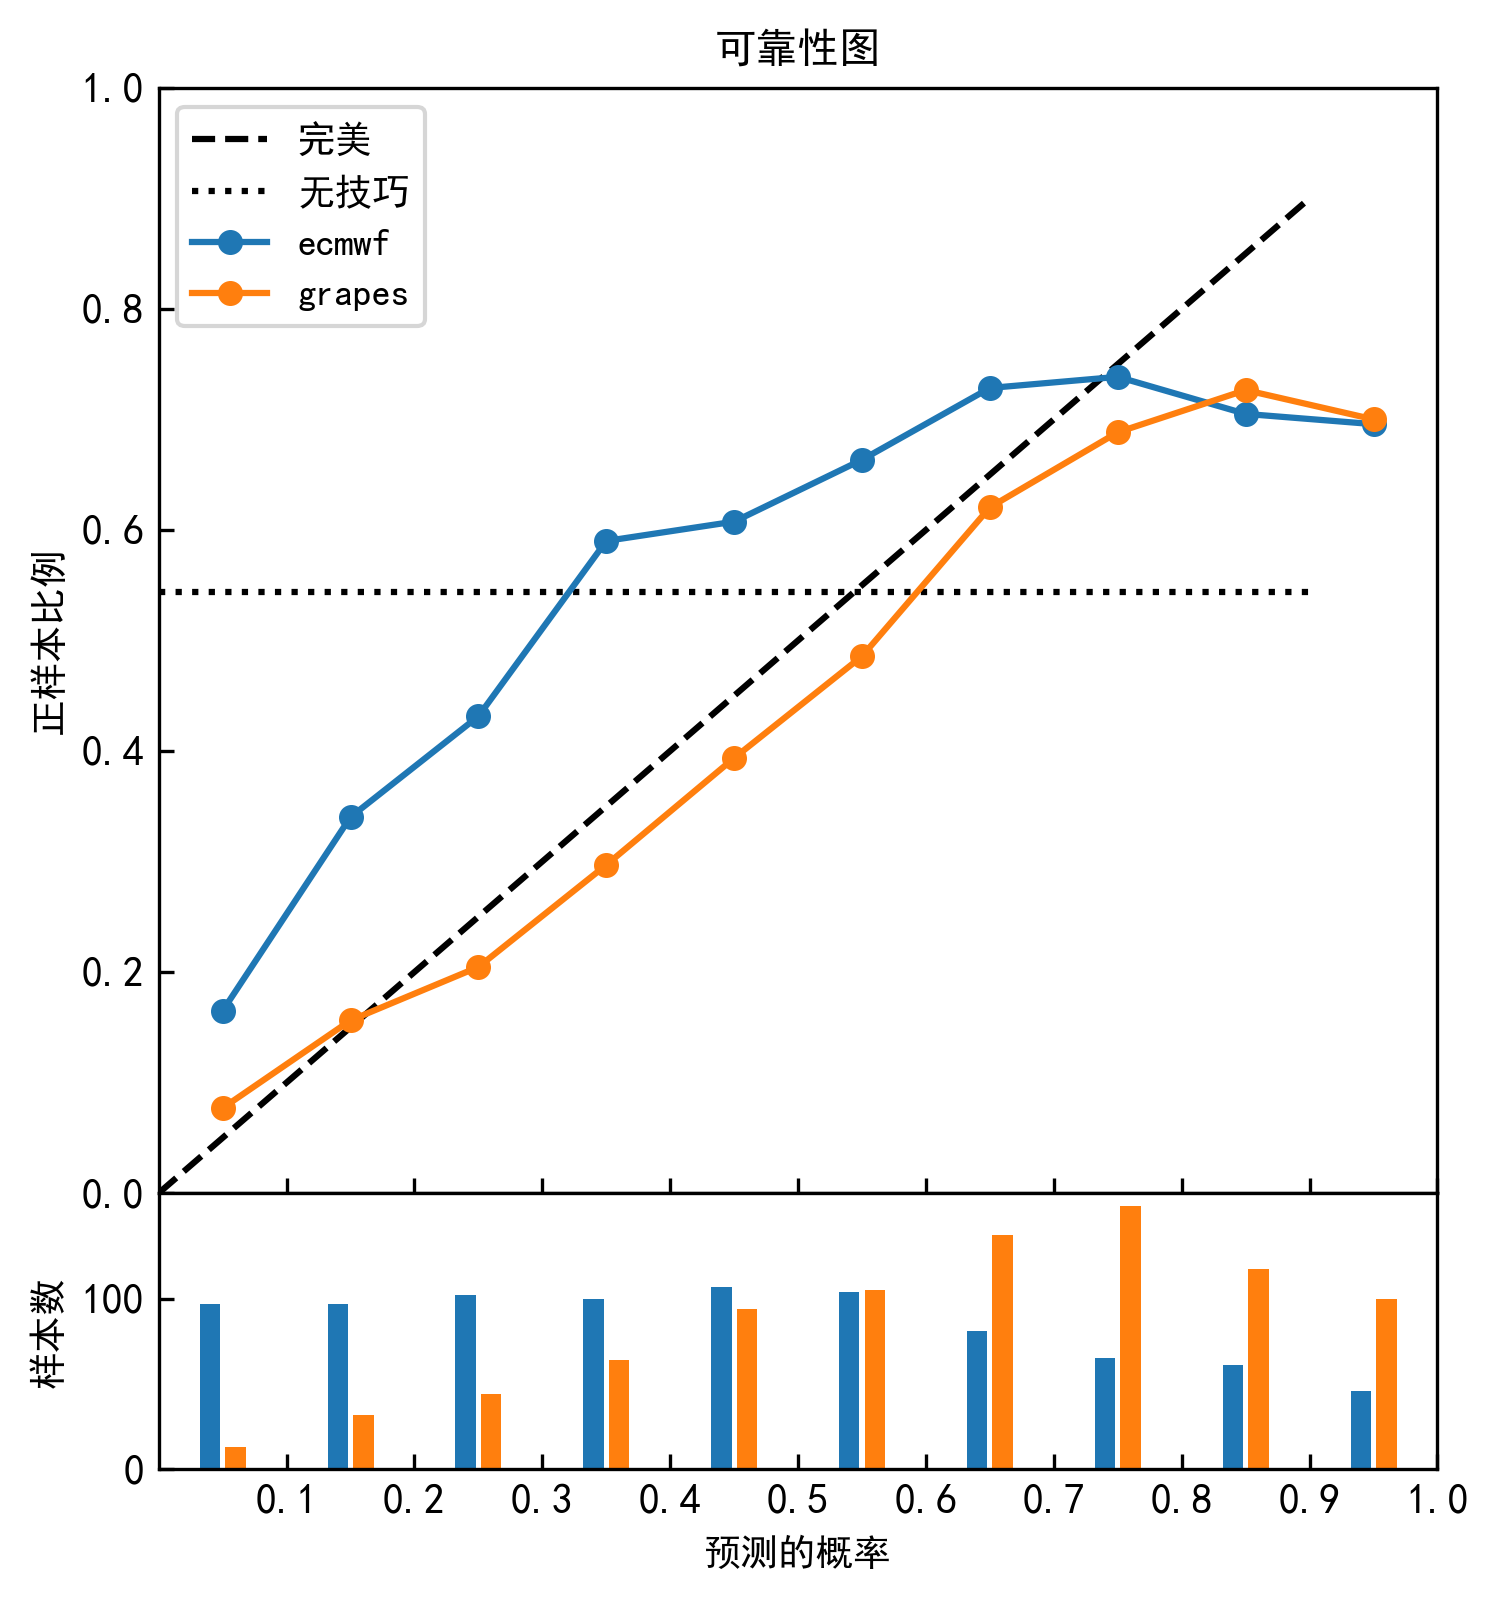

In [15]:
mpd.plot(sta_p0,mem.reliability)  #绘制概率预报区分能力图

('Ob', 'Fo', 'grade_count', 'member_list', 'save_path', 'show', 'dpi', 'title')


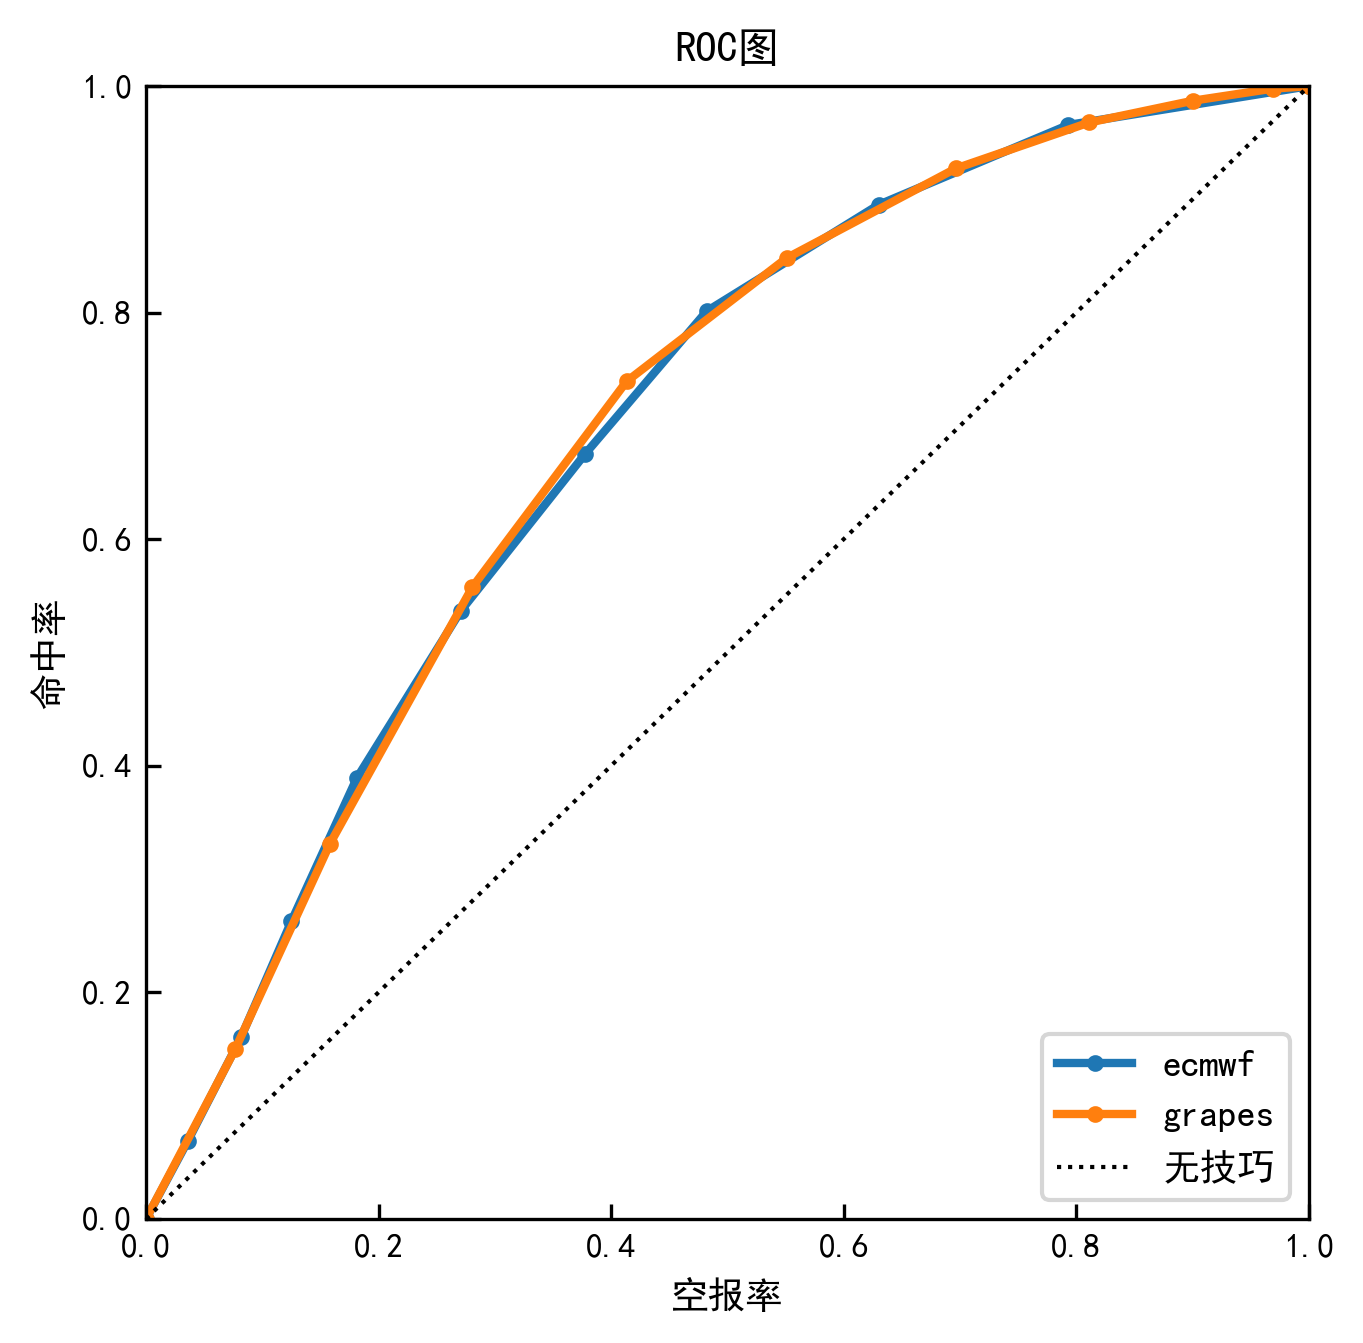

In [16]:
mpd.plot(sta_p0,mem.probability.plot.roc)

('Ob', 'Fo', 'grade_count', 'member_list', 'vmax', 'save_path', 'dpi', 'show', 'title')


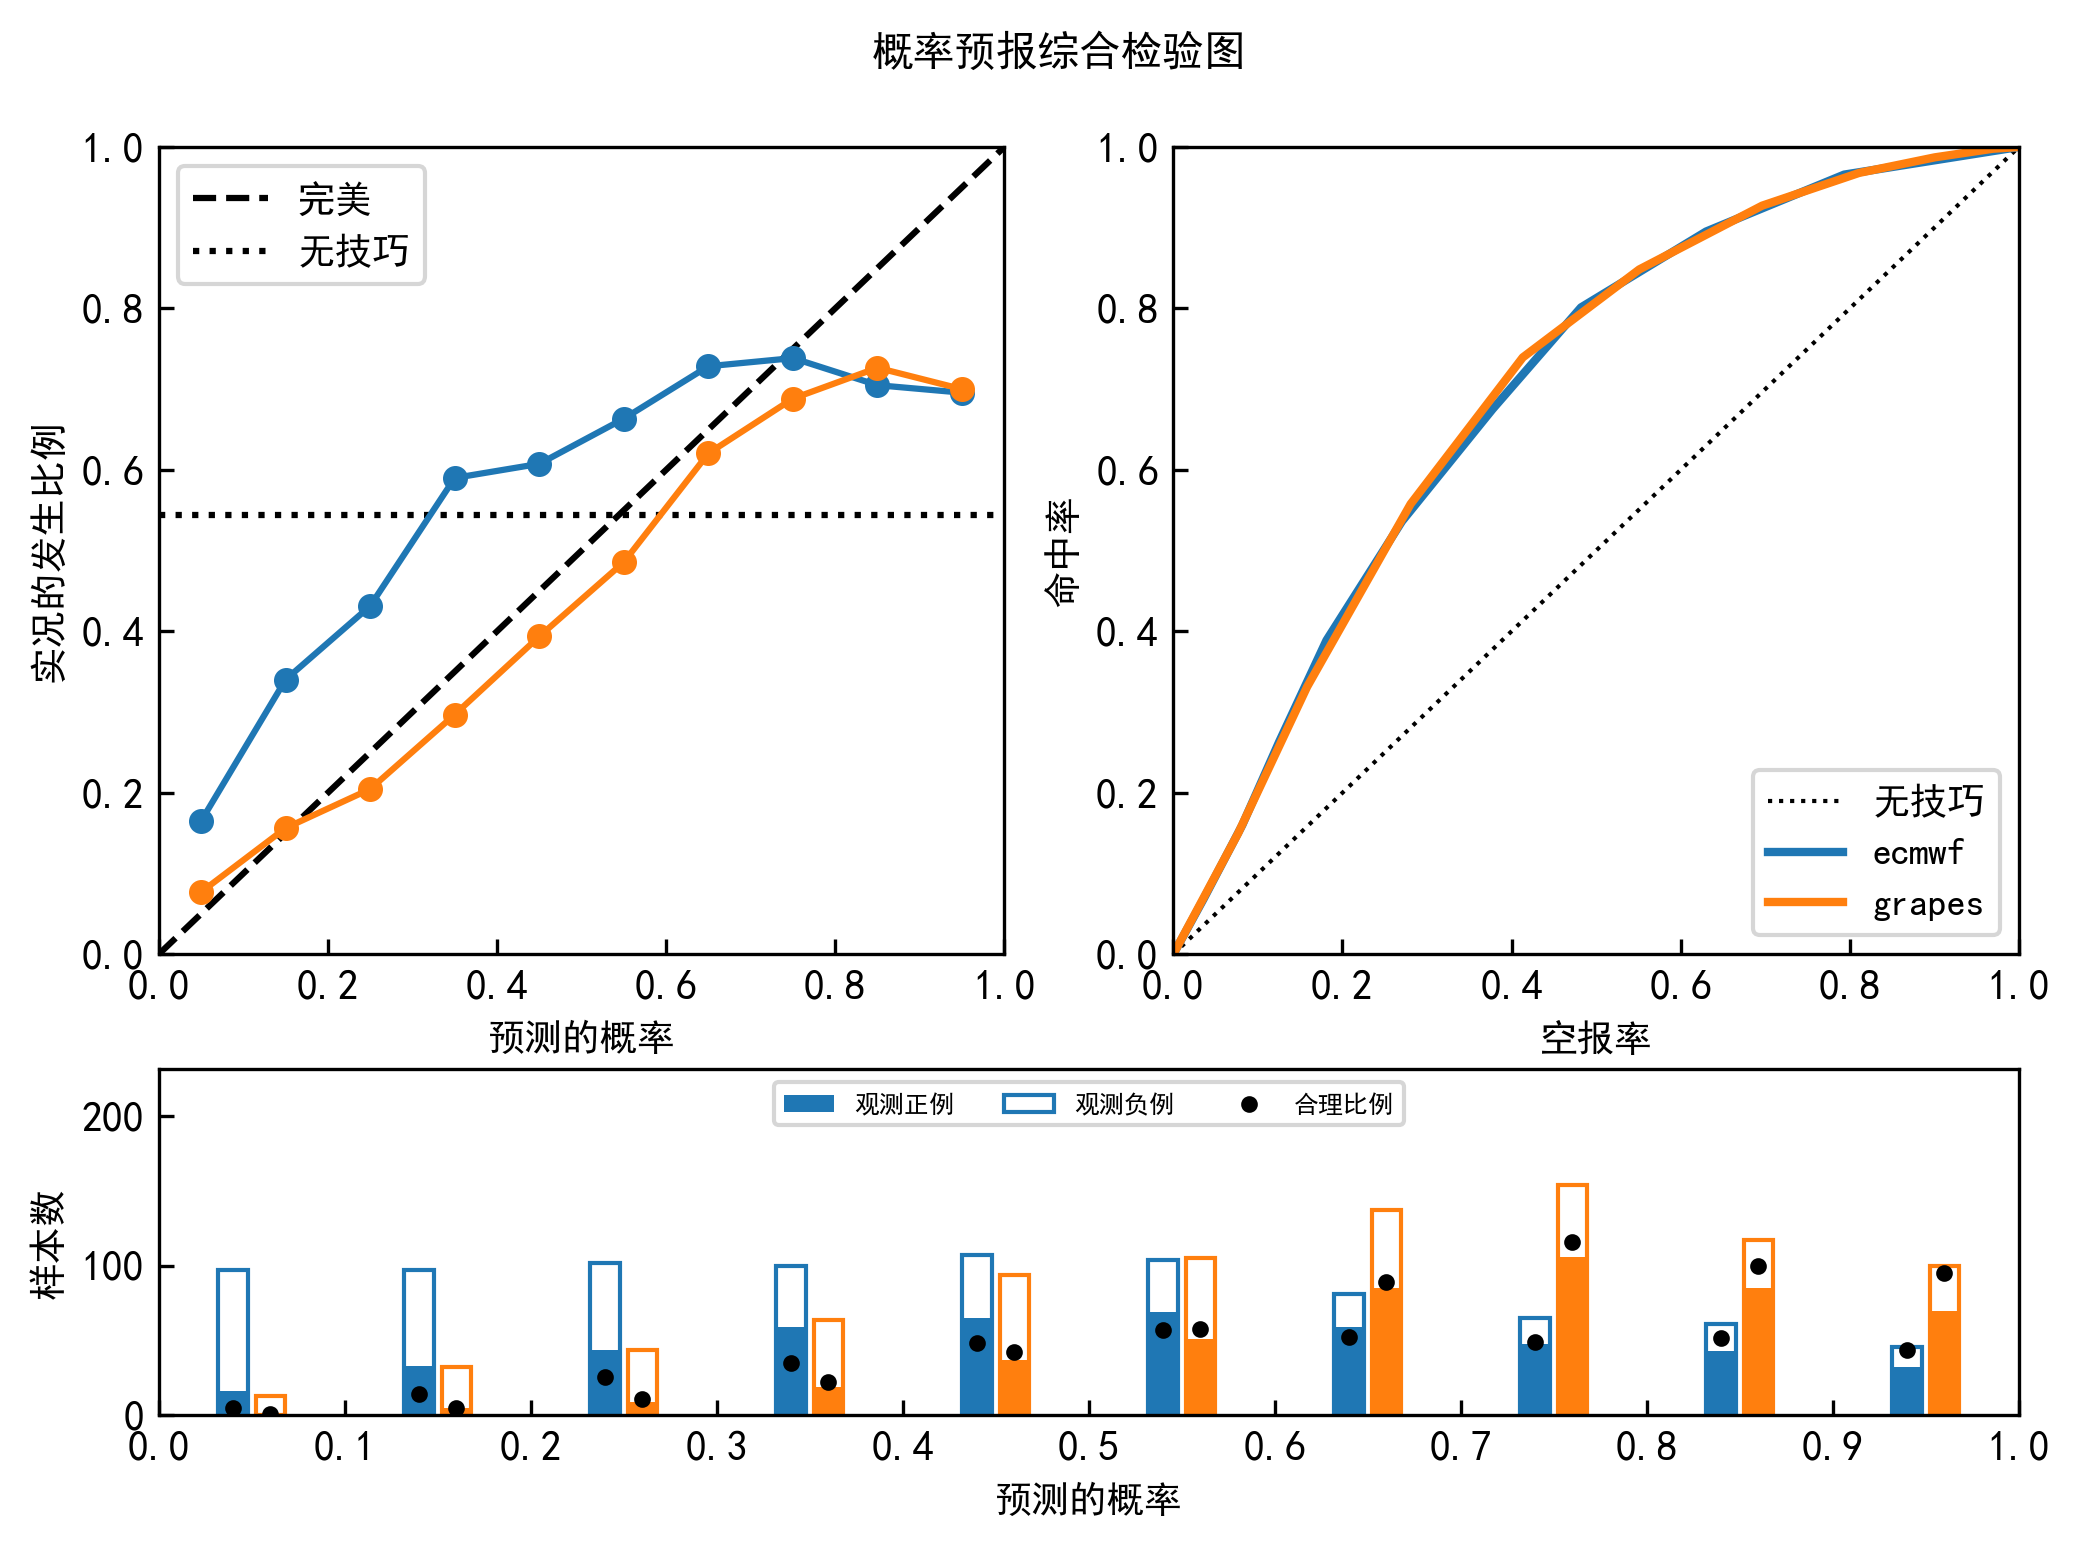

In [17]:
mpd.plot(sta_p0,mem.comprehensive_probability)